# Setup

First we need to run all the functions and data types that make up the model:

In [22]:
include("new model v9.jl");

Plausibility check ok? true
Plausibility check ok? true
Plausibility check ok? true
Plausibility check ok? true
Plausibility check ok? true
Plausibility check ok? true


Then, we define the parameter values we want to use in our simulations:

In [2]:
new_baseline_parameters = deepcopy(Parameters_set_standard);


#editing efficiency
new_baseline_parameters["e_e"] = 0.95;

#shredding efficiency
new_baseline_parameters["e_s"] = 0.90;

#shredding activity is perfectly dominant
new_baseline_parameters["h_e2"] = 1.0;

#homing efficiency
new_baseline_parameters["e_h"] = 0.95;



#no resistance occuring at target sites
new_baseline_parameters["er_1"] = 0.0;
new_baseline_parameters["er_2"] = 0.0;
new_baseline_parameters["er_3"] = 0.0;


#no loss of function mutations
new_baseline_parameters["m_1"] = 0.0;
new_baseline_parameters["m_2"] = 0.0;


#ideal intended fitness costs are perfect
new_baseline_parameters["s_f"] = 1.0;
new_baseline_parameters["h_f"] = 1.0;


#no unintended fitness costs
new_baseline_parameters["s_a"] = 0.0;
new_baseline_parameters["s_b"] = 0.0;
new_baseline_parameters["s_c"] = 0.0;
new_baseline_parameters["s_d"] = 0.0;
new_baseline_parameters["s_e"] = 0.0;
new_baseline_parameters["h_e"] = 0.0;
new_baseline_parameters["s_m"] = 0.0;


#recombination rate (of X-linked loci; ie editing gene and shredding target site)
new_baseline_parameters["r"] = 0.5


#intrinsic rate of population increase of 6
new_baseline_parameters["Rm"] = 6



#first we initiate a vector that represents a normal wild-type population (no resistances, no transgenes present)
genotype_standard = generate_population();

#then we will assume heterozygous releases (YLE (= "AB") and 1 ASD (= "CD")/1 wt autosome (="cd")) are added into the population
genotype_standard[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.001");


#for a better understanding of the symbolic representation of genetic elements please have a look 
#at the beginning of the model code in the model file ("new model v9.jl")
#all types of alleles and chromosomes are listed there

# What happens if constructs are released individually? (Sup Fig XXX)

In [25]:
#assume YLE released in population at 0.1%
YLE_release = generate_population();
YLE_release[return_i(["AB" "ef" "cd" "cd"], genotypes_detailed)] = BigFloat("0.001");

YLE_run1 = timecourse(5000, YLE_release)

Dict{String, Matrix{BigFloat}} with 5 entries:
  "genotypes" => [1.0 0.999001 … 0.998811 0.998811; 0.0 0.0 … 0.0 0.0; … ; 0.0 …
  "wildtype"  => [1.0 0.999001 … 0.998811 0.998811; 0.0 0.0 … 0.0 0.0; … ; 0.0 …
  "eggs"      => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; …
  "zygotes"   => [0.0 59.9401 … 59.8718 59.8718; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0…
  "sperm"     => [0.0 0.4995 … 0.4995 0.4995; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … …

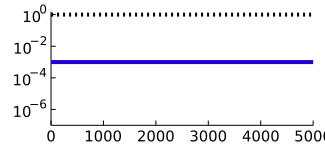

In [26]:
SupFig1a = plot_run_comprehensive(YLE_run1, yle_total_bool = true, given_dpi = 300, given_size = (325,150))
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10, yaxis=:log, ylims = (1e-7,1.5))

savefig("SupFig1a.svg")

SupFig1a

Under ideal circumstances the YLE does not have much affect on population because it is so infrequent. It also does not disappear, as long as there is no fitness cost.

In [27]:
#assume X-Shredder is released in population at 0.1%
Shr_release = generate_population();
Shr_release[return_i(["ab" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.001");

Shr_run1 = timecourse(5000, Shr_release)

Dict{String, Matrix{BigFloat}} with 5 entries:
  "genotypes" => [1.0 0.99995 … 0.999941 0.999941; 0.001 0.000949051 … 0.000209…
  "wildtype"  => [1.0 0.9995 … 0.999847 0.999847; 0.001 0.0004995 … 0.000115041…
  "eggs"      => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; …
  "zygotes"   => [0.0 59.997 … 59.9852 59.9852; 0.0 0.056943 … 0.0125474 0.0125…
  "sperm"     => [0.0 0.499975 … 0.499995 0.499995; 0.0 0.000474525 … 9.93549e-…

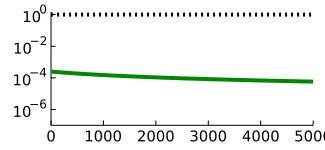

In [28]:
SupFig1b = plot_run_comprehensive(Shr_run1, shredder_total_all_bool = true, given_dpi = 300, given_size = (325,150))
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10, yaxis=:log, ylims = (1e-7,1.5))

savefig("SupFig1b.svg")

SupFig1b

The X-Shredder would disappear even under ideal circumstances, because it is distorts the sex ratio to its own disadvantage.


In reality there would be mutations and potentially even (small) fitness costs. Then both would disappear and much faster. Overall, the constructs themselves cannot spread or supress (relevantly) if they are released individually.

# Idealised release (Figure 2a)

In [3]:
apply_parameters_set(new_baseline_parameters);

run_baseline_scenario = timecourse(100, genotype_standard);

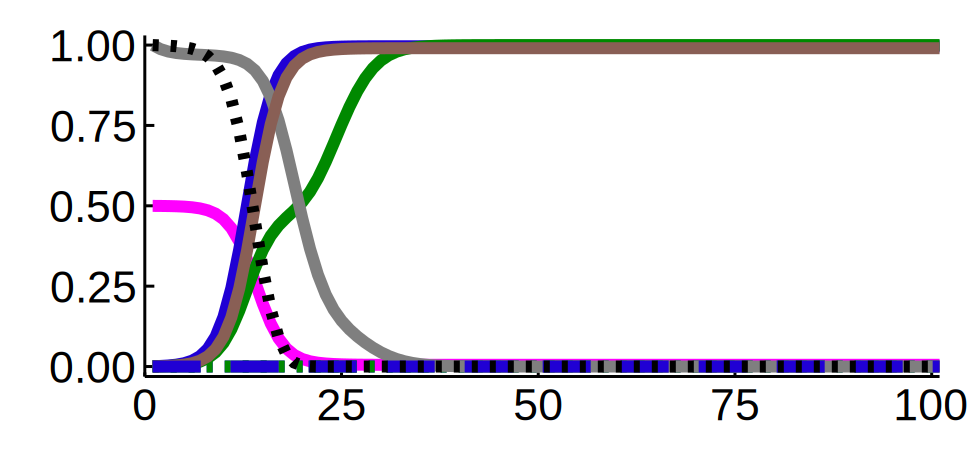

In [4]:
newfig1a = plot_run_comprehensive(run_baseline_scenario, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, load_easy_bool = false, load_demanding_bool = false, print_load = false, sexratio_bool = true,
            inverse_load_bool = true, compare_load_calcuations = false)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig(newfig1a, "newfig1a.svg")

newfig1a

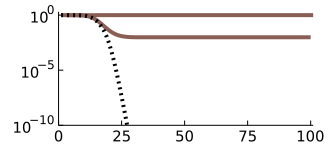

In [11]:
newfig1a = plot_run_comprehensive(run_baseline_scenario, yle_total_bool = false, shredder_total_male_bool = false, correlation_bool = false,
            given_dpi = 300, given_size = (325,150), dCas9_bool = false, dgRNA1_bool = false, dgRNA2_bool = false, 
            dshredder_bool = false, load_easy_bool = true, load_demanding_bool = false, log_safe = true, load_zygotes_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)
plot!(yaxis=:log, ylims = (1e-10, 2))

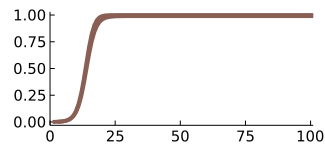

In [39]:
plot_run_comprehensive(run_baseline_scenario, allfemales_bool = false, yle_total_bool = false, shredder_total_male_bool = false, correlation_bool = false,
            given_dpi = 300, given_size = (325,150), dCas9_bool = false, dgRNA1_bool = false, dgRNA2_bool = false, 
            dshredder_bool = false, load_easy_bool = false, load_demanding_bool = false, print_load = false, sexratio_bool = false,
            inverse_load_bool = true, compare_load_calcuations = false, load_zygotes_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)
#plot!(yaxis=:log, ylims = (1e-1, 1))

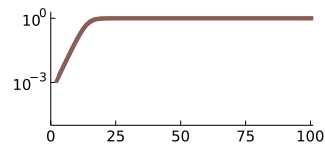

In [44]:
plot_run_comprehensive(run_baseline_scenario, allfemales_bool = false, yle_total_bool = false, shredder_total_male_bool = false, correlation_bool = false,
            given_dpi = 300, given_size = (325,150), dCas9_bool = false, dgRNA1_bool = false, dgRNA2_bool = false, 
            dshredder_bool = false, load_easy_bool = false, load_demanding_bool = false, print_load = false, sexratio_bool = false,
            inverse_load_bool = true, compare_load_calcuations = false, load_zygotes_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)
plot!(yaxis=:log, ylims = (1e-5,2))

# Idealised release in separate males (Figure 2b)

In [11]:
separate_release = generate_population();
separate_release[return_i(["AB" "ef" "cd" "cd"], genotypes_detailed)] = 0.001;
separate_release[return_i(["ab" "ef" "CD" "cd"], genotypes_detailed)] = 0.001;

separte_run = timecourse(100, separate_release);

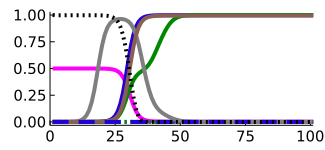

In [12]:
newfig1b = plot_run_comprehensive(separte_run, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, load_easy_bool = false, load_demanding_bool = false, print_load = false, sexratio_bool = true,
            inverse_load_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig(newfig1b, "newfig1b.svg")

newfig1b

# Allowing Loss-of-Function mutations (Figure 2c+d)

In [3]:
#now we turn mutations on
mutations_parameters = deepcopy(new_baseline_parameters);


#no mutation
mutations_parameters["m_1"] = 1e-3;
mutations_parameters["m_2"] = 1e-6;


apply_parameters_set(mutations_parameters);

In [4]:
mutations_run = timecourse(150, genotype_standard);

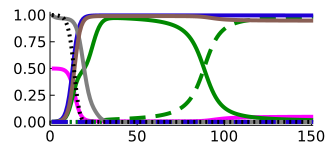

In [15]:
newfig1c = plot_run_comprehensive(mutations_run, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, load_easy_bool = false, load_demanding_bool = false, print_load = false, sexratio_bool = true,
            inverse_load_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig(newfig1c, "newfig1c.svg")

newfig1c

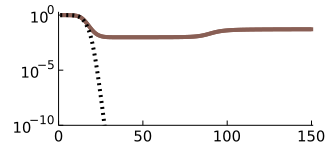

In [22]:
plot_run_comprehensive(mutations_run, yle_total_bool = false, shredder_total_male_bool = false, correlation_bool = false,
            given_dpi = 300, given_size = (325,150), dCas9_bool = false, dgRNA1_bool = false, dgRNA2_bool = false, 
            dshredder_bool = false, load_easy_bool = true, load_demanding_bool = true, log_safe = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)
plot!(yaxis=:log, ylims = (1e-10, 2))

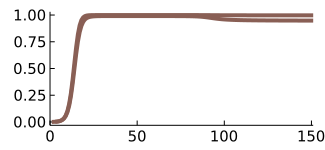

In [27]:
plot_run_comprehensive(mutations_run, allfemales_bool = false, yle_total_bool = false, shredder_total_male_bool = false, correlation_bool = false,
            given_dpi = 300, given_size = (325,150), dCas9_bool = false, dgRNA1_bool = false, dgRNA2_bool = false, 
            dshredder_bool = false, load_easy_bool = false, load_demanding_bool = false, print_load = false, sexratio_bool = false,
            inverse_load_bool = true, compare_load_calcuations = false, load_zygotes_bool = true, load_zygotes_bool2 = false )
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)


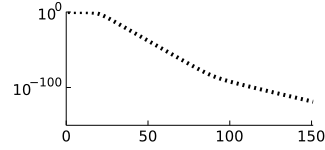

In [31]:
plot_run_comprehensive(mutations_run, yle_total_bool = false, given_dpi = 300, given_size = (325,150),)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)
plot!(yaxis=:log, ylims = (1e-150, 2))

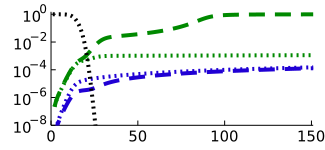

In [38]:
newfig1d = plot_run_comprehensive(mutations_run,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, log_safe = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10, yaxis=:log, ylims = (1e-8, 1.5), yticks = [1, 1e-2, 1e-4, 1e-6, 1e-8])

savefig(newfig1d, "newfig1d.svg")

newfig1d

## Including target site resistance (end-joining repair) (Figure 2e-g)

In [16]:
er1_resistance_parameters = deepcopy(mutations_parameters);
er2_resistance_parameters = deepcopy(mutations_parameters);
er3_resistance_parameters = deepcopy(mutations_parameters);


#no resistance occuring at target sites
er1_resistance_parameters["er_1"] = 0.05;
er2_resistance_parameters["er_2"] = 0.05;
er3_resistance_parameters["er_3"] = 0.05;

In [17]:
apply_parameters_set(er1_resistance_parameters);

er1_run = timecourse(150, genotype_standard);

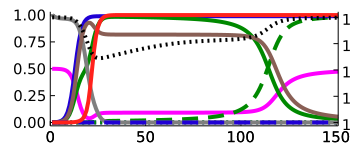

In [18]:
newfig1e = plot_run_comprehensive(er1_run, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (350,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, res1_bool = true, allfemales_log = true, second_y_log_lims = [1e-8, 1.5],
            load_easy_bool = false, load_demanding_bool = false, print_load = false, sexratio_bool = true,
            inverse_load_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig(newfig1e, "newfig1g.svg")

newfig1e

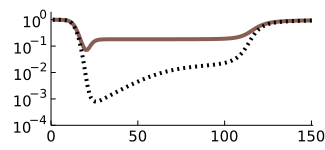

In [42]:
plot_run_comprehensive(er1_run, yle_total_bool = false, shredder_total_male_bool = false, correlation_bool = false,
            given_dpi = 300, given_size = (325,150), dCas9_bool = false, dgRNA1_bool = false, dgRNA2_bool = false, 
            dshredder_bool = false, load_easy_bool = true, load_demanding_bool = false, log_safe = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)
plot!(yaxis=:log, ylims = (1e-4, 2))

In [43]:
return_min_population_size_and_max_transgenic_freq(er1_run)

Minimum population size is 0.00079001090258955105733735691593471555742
Minimum population size is 0.98919674076189011177574119927157954892
Minimum population size is 0.99998410822972050626149199965609104468


In [19]:
apply_parameters_set(er2_resistance_parameters);

er2_run = timecourse(150, genotype_standard);

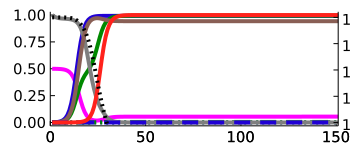

In [20]:
newfig1f =  plot_run_comprehensive(er2_run, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (350,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, res2_bool = true, allfemales_log = true, second_y_log_lims = [1e-8, 1.5],
            load_easy_bool = false, load_demanding_bool = false, print_load = false, sexratio_bool = true,
            inverse_load_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)


savefig(newfig1f, "newfig1f.svg")

newfig1f

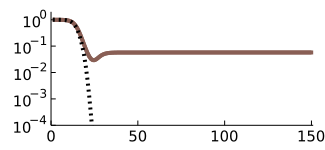

In [46]:
plot_run_comprehensive(er2_run, yle_total_bool = false, shredder_total_male_bool = false, correlation_bool = false,
            given_dpi = 300, given_size = (325,150), dCas9_bool = false, dgRNA1_bool = false, dgRNA2_bool = false, 
            dshredder_bool = false, load_easy_bool = true, load_demanding_bool = true, log_safe = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)
plot!(yaxis=:log, ylims = (1e-4, 2))

In [21]:
apply_parameters_set(er3_resistance_parameters);

er3_run = timecourse(150, genotype_standard);

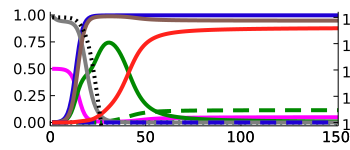

In [22]:
newfig1g =  plot_run_comprehensive(er3_run, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (350,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, res3_bool = true, allfemales_log = true, second_y_log_lims = [1e-8, 1.5],
            load_easy_bool = false, load_demanding_bool = false, print_load = false, sexratio_bool = true,
            inverse_load_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig(newfig1g, "newfig1e.svg")

newfig1g

# Resistance parameter scans (Figure 3)

This is the code for the scans, running it takes quite some time. The actual results as stored in csv files which can be read quickly to reproduce plots. 

In [23]:
# er1 = Any["value" "sup" "dur" "Y" "S"]
# er2 = Any["value" "sup" "dur" "Y" "S"]
# er3 = Any["value" "sup" "dur" "Y" "S"]


# apply_parameters_set(Parameters_set_sensitivity2)

# save_current_matrices = deepcopy(current_matrices)
# save_current_Parameters = deepcopy(Parameters_set_sensitivity2)

# current_matrices = deepcopy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)



# for i in -6:0.05:0
#     global er1
#     current_Parameters["er_1"] = 10^(i)

#     editing_matrix0 = deepcopy(editing_matrix_num)

#     for i in 1:length(editing_matrix[:,1])
#         for j in editing_symbols[i]
#             editing_matrix0[i,j] = BigFloat(float.(editing_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["editing_matrix"] = editing_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     er1 = vcat(er1, add)

# end

# writedlm("er1_scan_005",  er1, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.01:1
#     global er2
#     current_Parameters["er_2"] = i
#     sperm_matrix0 = deepcopy(sperm_matrix_num)

#     for i in 1:length(sperm_matrix[:,1])
#         for j in sperm_symbols[i]
#             sperm_matrix0[i,j] = BigFloat(float.(sperm_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end
#     current_matrices["sperm_matrix"] = sperm_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     er2 = vcat(er2, add)
# end
# writedlm("er2_scan_005",  er2, ',')



# #--------------------------------------
# #--------------------------------------

# er1 = Any["value" "sup" "dur" "Y" "S"]
# er2 = Any["value" "sup" "dur" "Y" "S"]
# er3 = Any["value" "sup" "dur" "Y" "S"]



# apply_parameters_set(Parameters_set_sensitivity3)
# save_current_matrices = deepcopy(current_matrices)
# save_current_Parameters = deepcopy(Parameters_set_sensitivity3)

# current_matrices = deepcopy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in -6:0.05:0
#     global er1
#     current_Parameters["er_1"] = 10^(i)

#     editing_matrix0 = deepcopy(editing_matrix_num)

#     for i in 1:length(editing_matrix[:,1])
#         for j in editing_symbols[i]
#             editing_matrix0[i,j] = BigFloat(float.(editing_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["editing_matrix"] = editing_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     er1 = vcat(er1, add)

# end

# writedlm("er1_scan_06",  er1, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.01:1
#     global er2
#     current_Parameters["er_2"] = i
#     sperm_matrix0 = deepcopy(sperm_matrix_num)

#     for i in 1:length(sperm_matrix[:,1])
#         for j in sperm_symbols[i]
#             sperm_matrix0[i,j] = BigFloat(float.(sperm_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end
#     current_matrices["sperm_matrix"] = sperm_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     er2 = vcat(er2, add)
# end
# writedlm("er2_scan_06",  er2, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0.5:0.01:1
#     global er3
#     current_Parameters["er_3"] = i
#     homing_matrix0 = deepcopy(homing_matrix_num)

#     for i in 1:length(homing_matrix[:,1])
#         for j in homing_symbols[i]
#             homing_matrix0[i,j] = BigFloat(float.(homing_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["homing_matrix"] = homing_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     er3 = vcat(er3, add)
# end
# writedlm("er3_scan",  er3, ',')



After running, the results can be read from the saved CSV files:

In [24]:
er1_005 = readdlm("er1_scan_005", ',')
er1_06 = readdlm("er1_scan_06", ',')


er2_005 = readdlm("er2_scan_005", ',')
er2_06 = readdlm("er2_scan_06", ',')


er3 = readdlm("er3_scan", ',')

52×5 Matrix{Any}:
  "value"   "sup"          "dur"   "Y"        "S"
 0.5       5.17261e-65  116.0     0.997244   0.365999
 0.51      1.77491e-64  116.0     0.997165   0.355957
 0.52      6.46379e-64  115.0     0.99708    0.346223
 0.53      2.51065e-63  114.0     0.996987   0.336496
 0.54      1.04582e-62  114.0     0.996887   0.326778
 0.55      4.70057e-62  113.0     0.996779   0.317099
 0.56      2.29532e-61  112.0     0.996662   0.307472
 0.57      1.22707e-60  111.0     0.996535   0.297895
 0.58      7.24403e-60  110.0     0.996397   0.288351
 0.59      4.769e-59    109.0     0.996248   0.278808
 0.6       3.54022e-58  108.0     0.996085   0.269496
 0.61      3.00113e-57  107.0     0.995908   0.260144
 ⋮                                           
 0.89      0.96574        0.0     0.0299079  0.000885804
 0.9       0.971193       0.0     0.0251487  0.000885804
 0.91      0.974983       0.0     0.0218398  0.000885804
 0.92      0.977789       0.0     0.0193914  0.000885804
 0.93     

Now, we can plot the minimal population size for different parameter values against time:

# Homing resistance scan

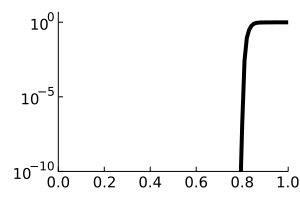

In [25]:
er3_plot = plot(er3[2:end,1], (er3[2:end,2]), lw = 4, label = "min pop size", colour=:black,
    dpi = 300, size = (300,200), legend = false, ylims = (1e-10, 5), yaxis =:log)
plot!(ytickfontsize = 10, xtickfontsize = 10, grid = false, xlims = (0,1))

savefig(er3_plot, "er3_scan_figure3.svg")

er3_plot

# Shredding resistance scan

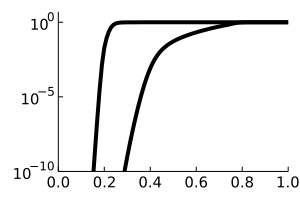

In [26]:
er2_plot = sensitivity_plot2(er2_005, er2_06, given_size = (300,200))
plot!(xlims = (0,1))

savefig(er2_plot, "er2_scan_figure3.svg")


er2_plot

# Editing resistance scan

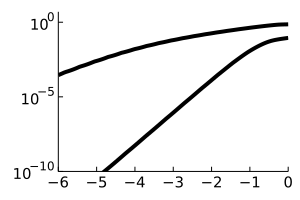

In [27]:
er1_plot = sensitivity_plot2(er1_005, er1_06, given_size = (300,200))
plot!(xlims = (-6,0))

savefig(er1_plot, "er1_scan_figure3.svg")


er1_plot

# Parameter sensitivity analysis (local)

Next we investigate the impact of changes in parameter values on minimal population size.

Again, the following code is used to calculate outcomes for different parameter values. This will take a lot of computational time. Eventually, results are saved in CSV files which can be accessed readily: 

In [28]:
# sf = Any["value" "sup" "dur" "Y" "S"]
# hf = Any["value" "sup" "dur" "Y" "S"]

# sa = Any["value" "sup" "dur" "Y" "S"]
# sb = Any["value" "sup" "dur" "Y" "S"]
# sc = Any["value" "sup" "dur" "Y" "S"]
# sd = Any["value" "sup" "dur" "Y" "S"]
# se = Any["value" "sup" "dur" "Y" "S"]
# he = Any["value" "sup" "dur" "Y" "S"]

# prot_expression_cost = Any["value" "sup" "dur" "Y" "S"]

# sm = Any["value" "sup" "dur" "Y" "S"]

# ee = Any["value" "sup" "dur" "Y" "S"]
# eh = Any["value" "sup" "dur" "Y" "S"]
# es = Any["value" "sup" "dur" "Y" "S"]
# he2 = Any["value" "sup" "dur" "Y" "S"]

# shredding_activity_cost = Any["value" "sup" "dur" "Y" "S"]

# m1 = Any["value" "sup" "dur" "Y" "S"]
# m2 = Any["value" "sup" "dur" "Y" "S"]

# er1 = Any["value" "sup" "dur" "Y" "S"]
# er2 = Any["value" "sup" "dur" "Y" "S"]
# er3 = Any["value" "sup" "dur" "Y" "S"]




# apply_parameters_set(Parameters_set_sensitivity2)
# save_current_matrices = deepcopy(current_matrices)
# save_current_Parameters = deepcopy(Parameters_set_sensitivity2)

# current_matrices = deepcopy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 1:-0.01:0
#     global sf
#     current_Parameters["s_f"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     sf = vcat(sf, add)

# end

# writedlm("sf_scan72",  sf, ',')

# current_matrices = deepcopy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 1:-0.01:0
#     global hf
#     current_Parameters["h_f"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     hf = vcat(hf, add)

# end
# writedlm("hf_scan72",  hf, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.005:1
#     global sa
#     current_Parameters["s_a"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     sa = vcat(sa, add)

# end
# writedlm("sa_scan72",  sa, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.005:1
#     global sb
#     current_Parameters["s_b"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     sb = vcat(sb, add)

# end
# writedlm("sb_scan72",  sb, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)



# for i in 0:0.005:1
#     global sc
#     current_Parameters["s_c"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     sc = vcat(sc, add)

# end
# writedlm("sc_scan72",  sc, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.005:1
#     global sd
#     current_Parameters["s_d"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     sd = vcat(sd, add)

# end
# writedlm("sd_scan72",  sd, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.005:1
#     global se
#     current_Parameters["s_e"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     se = vcat(se, add)


# end
# writedlm("se_scan72",  se, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.005:1
#     global he
#     current_Parameters["h_e"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     he = vcat(he, add)

# end
# writedlm("he_scan72",  he, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)



# for i in 0:0.005:1
#     global prot_expression_cost
#     current_Parameters["s_a"] = i
#     current_Parameters["s_c"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     prot_expression_cost = vcat(prot_expression_cost, add)

# end
# writedlm("prot_expression_cost_scan72",  prot_expression_cost, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.02:1
#     global sm
#     current_Parameters["s_m"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     sm = vcat(sm, add)


# end
# writedlm("sm_scan72",  sm, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 1:-0.01:0
#     global ee
#     current_Parameters["e_e"] = i

#     editing_matrix0 = deepcopy(editing_matrix_num)

#     for i in 1:length(editing_matrix[:,1])
#         for j in editing_symbols[i]
#             editing_matrix0[i,j] = BigFloat(float.(editing_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["editing_matrix"] = editing_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     ee = vcat(ee, add)

# end
# writedlm("ee_scan72",  ee, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 1:-0.01:0
#     global eh
#     current_Parameters["e_h"] = i

#     homing_matrix0 = deepcopy(homing_matrix_num)

#     for i in 1:length(homing_matrix[:,1])
#         for j in homing_symbols[i]
#             homing_matrix0[i,j] = BigFloat(float.(homing_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["homing_matrix"] = homing_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     eh = vcat(eh, add)
# end
# writedlm("eh_scan72",  eh, ',')




# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)

# for i in 1:-0.01:0
#     global es
#     current_Parameters["e_s"] = i

#     sperm_matrix0 = deepcopy(sperm_matrix_num)

#     for i in 1:length(sperm_matrix[:,1])
#         for j in sperm_symbols[i]
#             sperm_matrix0[i,j] = BigFloat(float.(sperm_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["sperm_matrix"] = sperm_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     es = vcat(es, add)

# end
# writedlm("es_scan72",  es, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 1:-0.01:0
#     global he2
#     current_Parameters["h_e2"] = i

#     sperm_matrix0 = deepcopy(sperm_matrix_num)

#     for i in 1:length(sperm_matrix[:,1])
#         for j in sperm_symbols[i]
#             sperm_matrix0[i,j] = BigFloat(float.(sperm_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["sperm_matrix"] = sperm_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     he2 = vcat(he2, add)
# end

# writedlm("he2_scan72",  he2, ',')

# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 1:-0.01:0
#     global shredding_activity_cost
#     current_Parameters["h_e"] = i
#     current_Parameters["h_e2"] = i

#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))

#     sperm_matrix0 = deepcopy(sperm_matrix_num)

#     for i in 1:length(sperm_matrix[:,1])
#         for j in sperm_symbols[i]
#             sperm_matrix0[i,j] = BigFloat(float.(sperm_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["sperm_matrix"] = sperm_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     shredding_activity_cost = vcat(shredding_activity_cost, add)
# end

# writedlm("shredding_activity_cost_scan72",  shredding_activity_cost, ',')


# current_matrices = deepcopy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in -3:0.05:0
#     global m1
#     current_Parameters["m_1"] = 10^(i)
#     homing_matrix0 = deepcopy(homing_matrix_num)

#     for i in 1:length(homing_matrix[:,1])
#         for j in homing_symbols[i]
#             homing_matrix0[i,j] = BigFloat(float.(homing_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["homing_matrix"] = homing_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     m1 = vcat(m1, add)

# end

# writedlm("m1_scan72",  m1, ',')

# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)

# for i in -3:0.05:0
#     global m2
#     current_Parameters["m_2"] = 10^(i)
#     mutation_matrix0 = deepcopy(mutation_matrix_num)

#     for i in 1:length(mutation_matrix[:,1])
#         for j in mutation_symbols[i]
#             mutation_matrix0[i,j] = BigFloat(float.(mutation_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["mutation_matrix"] = mutation_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     m2 = vcat(m2, add)

# end

# writedlm("m2_scan72",  m2, ',')

# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in -6:0.05:0
#     global er1
#     current_Parameters["er_1"] = 10^(i)

#     editing_matrix0 = deepcopy(editing_matrix_num)

#     for i in 1:length(editing_matrix[:,1])
#         for j in editing_symbols[i]
#             editing_matrix0[i,j] = BigFloat(float.(editing_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["editing_matrix"] = editing_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     er1 = vcat(er1, add)

# end

# writedlm("er1_scan72",  er1, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.01:1
#     global er2
#     current_Parameters["er_2"] = i
#     sperm_matrix0 = deepcopy(sperm_matrix_num)

#     for i in 1:length(sperm_matrix[:,1])
#         for j in sperm_symbols[i]
#             sperm_matrix0[i,j] = BigFloat(float.(sperm_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end
#     current_matrices["sperm_matrix"] = sperm_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     er2 = vcat(er2, add)
# end
# writedlm("er2_scan72",  er2, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.01:1
#     global er3
#     current_Parameters["er_3"] = i
#     homing_matrix0 = deepcopy(homing_matrix_num)

#     for i in 1:length(homing_matrix[:,1])
#         for j in homing_symbols[i]
#             homing_matrix0[i,j] = BigFloat(float.(homing_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["homing_matrix"] = homing_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     er3 = vcat(er3, add)
# end
# writedlm("er3_scan72",  er3, ',')



# #- -------


# sf = Any["value" "sup" "dur" "Y" "S"]
# hf = Any["value" "sup" "dur" "Y" "S"]

# sa = Any["value" "sup" "dur" "Y" "S"]
# sb = Any["value" "sup" "dur" "Y" "S"]
# sc = Any["value" "sup" "dur" "Y" "S"]
# sd = Any["value" "sup" "dur" "Y" "S"]
# se = Any["value" "sup" "dur" "Y" "S"]
# he = Any["value" "sup" "dur" "Y" "S"]

# prot_expression_cost = Any["value" "sup" "dur" "Y" "S"]

# sm = Any["value" "sup" "dur" "Y" "S"]

# ee = Any["value" "sup" "dur" "Y" "S"]
# eh = Any["value" "sup" "dur" "Y" "S"]
# es = Any["value" "sup" "dur" "Y" "S"]
# he2 = Any["value" "sup" "dur" "Y" "S"]

# shredding_activity_cost = Any["value" "sup" "dur" "Y" "S"]

# m1 = Any["value" "sup" "dur" "Y" "S"]
# m2 = Any["value" "sup" "dur" "Y" "S"]

# er1 = Any["value" "sup" "dur" "Y" "S"]
# er2 = Any["value" "sup" "dur" "Y" "S"]
# er3 = Any["value" "sup" "dur" "Y" "S"]




# apply_parameters_set(Parameters_set_sensitivity3)
# save_current_matrices = deepcopy(current_matrices)
# save_current_Parameters = deepcopy(Parameters_set_sensitivity3)

# current_matrices = deepcopy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 1:-0.01:0
#     global sf
#     current_Parameters["s_f"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     sf = vcat(sf, add)

# end

# writedlm("sf_scan73",  sf, ',')

# current_matrices = deepcopy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 1:-0.01:0
#     global hf
#     current_Parameters["h_f"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     hf = vcat(hf, add)

# end
# writedlm("hf_scan73",  hf, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.005:1
#     global sa
#     current_Parameters["s_a"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     sa = vcat(sa, add)

# end
# writedlm("sa_scan73",  sa, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.005:1
#     global sb
#     current_Parameters["s_b"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     sb = vcat(sb, add)

# end
# writedlm("sb_scan73",  sb, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)



# for i in 0:0.005:1
#     global sc
#     current_Parameters["s_c"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     sc = vcat(sc, add)

# end
# writedlm("sc_scan73",  sc, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.005:1
#     global sd
#     current_Parameters["s_d"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     sd = vcat(sd, add)

# end
# writedlm("sd_scan73",  sd, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.005:1
#     global se
#     current_Parameters["s_e"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     se = vcat(se, add)


# end
# writedlm("se_scan73",  se, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.005:1
#     global he
#     current_Parameters["h_e"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     he = vcat(he, add)

# end
# writedlm("he_scan73",  he, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)



# for i in 0:0.005:1
#     global prot_expression_cost
#     current_Parameters["s_a"] = i
#     current_Parameters["s_c"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     prot_expression_cost = vcat(prot_expression_cost, add)

# end
# writedlm("prot_expression_cost_scan73",  prot_expression_cost, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.02:1
#     global sm
#     current_Parameters["s_m"] = i
#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     sm = vcat(sm, add)


# end
# writedlm("sm_scan73",  sm, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 1:-0.01:0
#     global ee
#     current_Parameters["e_e"] = i

#     editing_matrix0 = deepcopy(editing_matrix_num)

#     for i in 1:length(editing_matrix[:,1])
#         for j in editing_symbols[i]
#             editing_matrix0[i,j] = BigFloat(float.(editing_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["editing_matrix"] = editing_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     ee = vcat(ee, add)

# end
# writedlm("ee_scan73",  ee, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 1:-0.01:0
#     global eh
#     current_Parameters["e_h"] = i

#     homing_matrix0 = deepcopy(homing_matrix_num)

#     for i in 1:length(homing_matrix[:,1])
#         for j in homing_symbols[i]
#             homing_matrix0[i,j] = BigFloat(float.(homing_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["homing_matrix"] = homing_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     eh = vcat(eh, add)
# end
# writedlm("eh_scan73",  eh, ',')




# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)

# for i in 1:-0.01:0
#     global es
#     current_Parameters["e_s"] = i

#     sperm_matrix0 = deepcopy(sperm_matrix_num)

#     for i in 1:length(sperm_matrix[:,1])
#         for j in sperm_symbols[i]
#             sperm_matrix0[i,j] = BigFloat(float.(sperm_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["sperm_matrix"] = sperm_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     es = vcat(es, add)

# end
# writedlm("es_scan73",  es, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 1:-0.01:0
#     global he2
#     current_Parameters["h_e2"] = i

#     sperm_matrix0 = deepcopy(sperm_matrix_num)

#     for i in 1:length(sperm_matrix[:,1])
#         for j in sperm_symbols[i]
#             sperm_matrix0[i,j] = BigFloat(float.(sperm_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["sperm_matrix"] = sperm_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     he2 = vcat(he2, add)
# end

# writedlm("he2_scan73",  he2, ',')

# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 1:-0.01:0
#     global shredding_activity_cost
#     current_Parameters["h_e"] = i
#     current_Parameters["h_e2"] = i

#     current_matrices["selection_matrix"] = BigFloat.(float.(selection_matrix.evalf(subs = current_Parameters, given_precision)))

#     sperm_matrix0 = deepcopy(sperm_matrix_num)

#     for i in 1:length(sperm_matrix[:,1])
#         for j in sperm_symbols[i]
#             sperm_matrix0[i,j] = BigFloat(float.(sperm_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["sperm_matrix"] = sperm_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     shredding_activity_cost = vcat(shredding_activity_cost, add)
# end

# writedlm("shredding_activity_cost_scan73",  shredding_activity_cost, ',')


# current_matrices = deepcopy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in -3:0.05:0
#     global m1
#     current_Parameters["m_1"] = 10^(i)
#     homing_matrix0 = deepcopy(homing_matrix_num)

#     for i in 1:length(homing_matrix[:,1])
#         for j in homing_symbols[i]
#             homing_matrix0[i,j] = BigFloat(float.(homing_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["homing_matrix"] = homing_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     m1 = vcat(m1, add)

# end

# writedlm("m1_scan73",  m1, ',')

# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)

# for i in -3:0.05:0
#     global m2
#     current_Parameters["m_2"] = 10^(i)
#     mutation_matrix0 = deepcopy(mutation_matrix_num)

#     for i in 1:length(mutation_matrix[:,1])
#         for j in mutation_symbols[i]
#             mutation_matrix0[i,j] = BigFloat(float.(mutation_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["mutation_matrix"] = mutation_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     m2 = vcat(m2, add)

# end

# writedlm("m2_scan73",  m2, ',')

# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in -6:0.05:0
#     global er1
#     current_Parameters["er_1"] = 10^(i)

#     editing_matrix0 = deepcopy(editing_matrix_num)

#     for i in 1:length(editing_matrix[:,1])
#         for j in editing_symbols[i]
#             editing_matrix0[i,j] = BigFloat(float.(editing_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["editing_matrix"] = editing_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     er1 = vcat(er1, add)

# end

# writedlm("er1_scan73",  er1, ',')



# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.01:1
#     global er2
#     current_Parameters["er_2"] = i
#     sperm_matrix0 = deepcopy(sperm_matrix_num)

#     for i in 1:length(sperm_matrix[:,1])
#         for j in sperm_symbols[i]
#             sperm_matrix0[i,j] = BigFloat(float.(sperm_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end
#     current_matrices["sperm_matrix"] = sperm_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     er2 = vcat(er2, add)
# end
# writedlm("er2_scan73",  er2, ',')


# current_matrices = copy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0.5:0.01:1
#     global er3
#     current_Parameters["er_3"] = i
#     homing_matrix0 = deepcopy(homing_matrix_num)

#     for i in 1:length(homing_matrix[:,1])
#         for j in homing_symbols[i]
#             homing_matrix0[i,j] = BigFloat(float.(homing_matrix0[i,j].evalf(subs = current_Parameters, given_precision)))
#         end
#     end

#     current_matrices["homing_matrix"] = homing_matrix0
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     er3 = vcat(er3, add)
# end
# writedlm("er3_scan73",  er3, ',')



# # ------------------
# # also Rm

# apply_parameters_set(Parameters_set_sensitivity2)

# Rm = Any["value" "sup" "dur" "Y" "S"]

# for i in 3:0.5:20
#     global Rm
#     current_Parameters["Rm"] = i
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     Rm = vcat(Rm, add)
# end

# writedlm("Rm_scan72",  Rm, ',')



# # -------------------
# apply_parameters_set(Parameters_set_sensitivity3)

# Rm = Any["value" "sup" "dur" "Y" "S"]

# for i in 3:0.5:20
#     global Rm
#     current_Parameters["Rm"] = i
#     sup, dur, Y, S = timecourse_parameterscan_comprehensive(150, genotype_standard)
#     add = [i sup dur Y S]
#     Rm = vcat(Rm, add)
# end

# writedlm("Rm_scan73",  Rm, ',')

We can easily read previously computed results and plot the results:

In [2]:
sf72 = readdlm("sf_scan72", ',')
sf73 = readdlm("sf_scan73", ',')
sf_lowRm78 =  readdlm("sf_scan78_veryLowRmOf2", ',')
sf_lowRm79 =  readdlm("sf_scan79_veryLowRmOf2", ',')


hf72 = readdlm("hf_scan72", ',')
hf73 = readdlm("hf_scan73", ',')


sa72 = readdlm("sa_scan72", ',')
sa73 = readdlm("sa_scan73", ',')


sb72 = readdlm("sb_scan72", ',')
sb73 = readdlm("sb_scan73", ',')


sc72 = readdlm("sc_scan72", ',')
sc73 = readdlm("sc_scan73", ',')


sd72 = readdlm("sd_scan72", ',')
sd73 = readdlm("sd_scan73", ',')


se72 = readdlm("se_scan72", ',')
se73 = readdlm("se_scan73", ',')


he72 = readdlm("he_scan72", ',')
he73 = readdlm("he_scan73", ',')


sm72 = readdlm("sm_scan72", ',')
sm73 = readdlm("sm_scan73", ',')


ee72 = readdlm("ee_scan72", ',')
ee73 = readdlm("ee_scan73", ',')


es72 = readdlm("es_scan72", ',')
es73 = readdlm("es_scan73", ',')


eh72 = readdlm("eh_scan72", ',')
eh73 = readdlm("eh_scan73", ',')


he272 = readdlm("he2_scan72", ',')
he273 = readdlm("he2_scan73", ',')


m172 = readdlm("m1_scan72", ',')
m173 = readdlm("m1_scan73", ',')


m272 = readdlm("m2_scan72", ',')
m273 = readdlm("m2_scan73", ',')


er172 = readdlm("er1_scan72", ',')
er173 = readdlm("er1_scan73", ',')


er272 = readdlm("er2_scan72", ',')
er273 = readdlm("er2_scan73", ',')


er372 = readdlm("er3_scan72", ',')
er373 = readdlm("er3_scan73", ',')

Rm72 = readdlm("Rm_scan72", ',')
Rm73 = readdlm("Rm_scan73", ',')

76×5 Matrix{Any}:
   "value"   "sup"          "dur"   "Y"       "S"
  3.0       1.50576e-92  112.0     0.996085  0.269496
  3.5       9.22384e-85  111.0     0.996085  0.269496
  4.0       4.40387e-78  110.0     0.996085  0.269496
  4.5       3.05047e-72  110.0     0.996085  0.269496
  5.0       4.66296e-67  109.0     0.996085  0.269496
  5.5       2.11566e-62  108.0     0.996085  0.269496
  6.0       3.54022e-58  108.0     0.996085  0.269496
  6.5       2.57369e-54  107.0     0.996085  0.269496
  7.0       9.22559e-51  107.0     0.996085  0.269496
  7.5       1.80172e-47  106.0     0.996085  0.269496
  8.0       2.07684e-44  106.0     0.996085  0.269496
  8.5       1.50817e-41  105.0     0.996085  0.269496
  ⋮                                          
 34.5       0.0170614      0.0     0.996085  0.269496
 35.0       0.0174719      0.0     0.996085  0.269496
 35.5       0.0178713      0.0     0.996085  0.269496
 36.0       0.01826        0.0     0.996085  0.269496
 36.5       0.0186383 

## Editing efficiency parameter scan

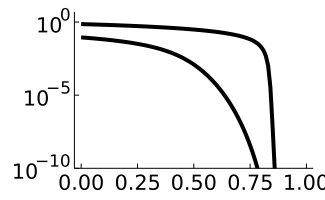

In [30]:
#for 100% editing efficiency, the minimium population size is so small that the model cannot handle the number

#julia> ee72[2,2]
#"2.9846506150389422174641287793843815895e-386"

#which is why it is safed as a string, but that cannot be plotted

#julia> typeof(ee72[2,2])
#SubString{String}

#so we have to manually get rid of this value, then the rest of the results can be plotted correctly

ee72[2,2] = NaN
ee_scan = sensitivity_plot2(ee72, ee73)
plot!(ytickfontsize = 14, xtickfontsize = 14)

savefig(ee_scan, "ee_scan7.svg")

ee_scan

## Shredding efficiency parameter scan

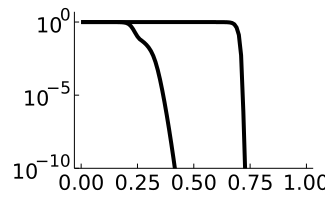

In [31]:
es_scan = sensitivity_plot2(es72, es73)
plot!(ytickfontsize = 14, xtickfontsize = 14)

savefig(es_scan, "es_scan7.svg")

es_scan

## Homing efficiency parameter scan

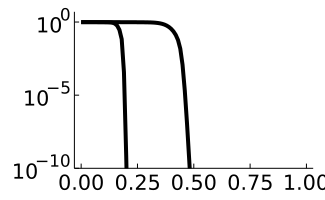

In [32]:
eh_scan = sensitivity_plot2(eh72, eh73)
plot!(ytickfontsize = 14, xtickfontsize = 14)

savefig(eh_scan, "eh_scan7.svg")

eh_scan

## Selection coefficient edited gene parameter scan

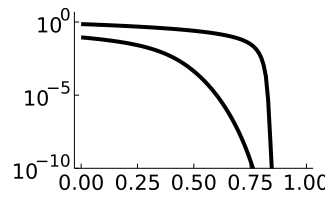

In [33]:
sf_scan = sensitivity_plot2(sf72, sf73)
plot!(ytickfontsize = 14, xtickfontsize = 14)

savefig(sf_scan, "sf_scan7.svg")

sf_scan

## Dominance coefficient edited gene efficiency parameter scan

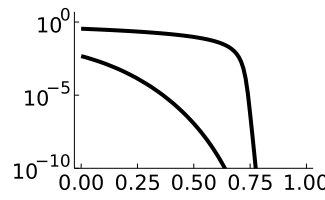

In [34]:
hf_scan = sensitivity_plot2(hf72, hf73)
plot!(ytickfontsize = 14, xtickfontsize = 14)

savefig(hf_scan, "hf_scan7.svg")

hf_scan

## (Unintended) fitness cost of Cas9 expression parameter scan

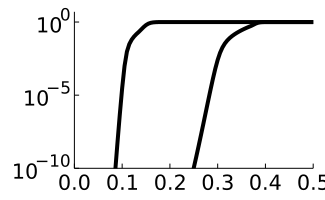

In [35]:
sa_scan = sensitivity_plot2(sa72, sa73)
plot!(xlims=(0,0.5))
plot!(ytickfontsize = 14, xtickfontsize = 14)

savefig(sa_scan, "sa_scan7.svg")

sa_scan

## (Unintended) fitness cost of gRNA(1 or 2) expression parameter scan

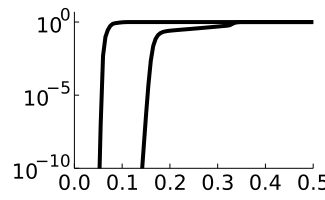

In [36]:
sb_scan = sensitivity_plot2(sb72, sb73)
plot!(xlims=(0,0.5))
plot!(ytickfontsize = 14, xtickfontsize = 14)

savefig(sb_scan, "sb_scan7.svg")

sb_scan

## (Unintended) fitness cost of X-Shredder expression parameter scan

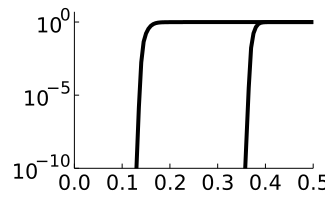

In [37]:
sc_scan = sensitivity_plot2(sc72, sc73)
plot!(xlims=(0,0.5))
plot!(ytickfontsize = 14, xtickfontsize = 14)

savefig(sc_scan, "sc_scan7.svg")

sc_scan

## (Unintended) fitness cost of Cas9-gRNA complex activity parameter scan

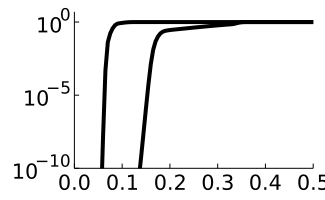

In [38]:
sd_scan = sensitivity_plot2(sd72, sd73)
plot!(xlims=(0,0.5))
plot!(ytickfontsize = 14, xtickfontsize = 14)

savefig(sd_scan, "sd_scan7.svg")

sd_scan

## (Unintended) fitness cost of X-Shredder activity parameter scan

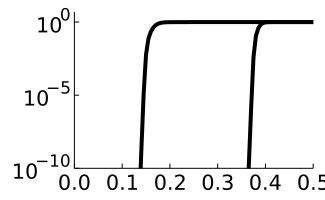

In [39]:
se_scan = sensitivity_plot2(se72, se73)
plot!(xlims=(0,0.5))
plot!(ytickfontsize = 14, xtickfontsize = 14)

savefig(se_scan, "se_scan7.svg")

se_scan

## Homing mutation rate (m1) parameter scan

In [40]:
# m1 values are stored as exponent to base 10 values, so we first transform values

for i in 2:length(m172[:,1])
    m172[i,1] = 10^(m172[i,1])
end

for i in 2:length(m173[:,1])
    m173[i,1] = 10^(m173[i,1])
end

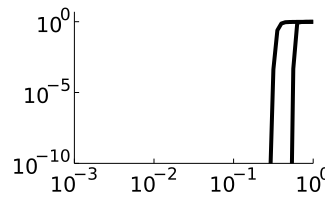

In [41]:
#then we plot 

m1_scan = sensitivity_plot2(m172, m173)
plot!(xaxis=:log, xlims = (1e-3,1), ytickfontsize = 14, xtickfontsize = 14)


savefig(m1_scan, "m1_scan7.svg")

m1_scan

## Background mutation rate (m2) parameter scan

In [42]:
# m2 values are also stored as exponent to base 10 values, so we first transform values

for i in 2:length(m272[:,1])
    m272[i,1] = 10^(m272[i,1])
end

for i in 2:length(m273[:,1])
    m273[i,1] = 10^(m273[i,1])
end

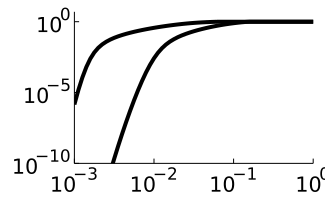

In [43]:
#then we plot 

m2_scan = sensitivity_plot2(m272, m273)
plot!(xaxis=:log, xlims = (1e-3,1), ytickfontsize = 14, xtickfontsize = 14)

savefig(m2_scan, "m2_scan7.svg")


m2_scan

## Intrinsic rate of population growth (Rm) parameter scan

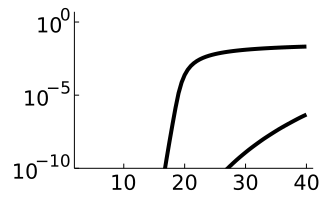

In [44]:
Rm_scan = sensitivity_plot2(Rm72, Rm73)
plot!(ytickfontsize = 14, xtickfontsize = 14)

savefig(Rm_scan, "Rm_scan7.svg")

Rm_scan

## Pre-existing restiance (Figure 5)

Next we investigate which effect pre-existing resistances have on the suppression effect.

For this we perfom simulations of populations with varying levels of pre-existing resistances, either for the low or high HDR case. Since computations are demanding, results are again pre-computed and saved as csv files. The original code is this:

In [45]:



# shredding_a = Any["value" "max_sup" "t_max_sup" "t_1e_2" "t_1e_3" "t_1e_4" "t_1e_5" "t_1e_6" "t_1e_7" "t_1e_8" "t_1e_9" "t_1e_10" "dur" "Y" "S"]
# homing_a = Any["value" "max_sup" "t_max_sup" "t_1e_2" "t_1e_3" "t_1e_4" "t_1e_5" "t_1e_6" "t_1e_7" "t_1e_8" "t_1e_9" "t_1e_10" "dur" "Y" "S"]
# shredding_b =Any["value" "max_sup" "t_max_sup" "t_1e_2" "t_1e_3" "t_1e_4" "t_1e_5" "t_1e_6" "t_1e_7" "t_1e_8" "t_1e_9" "t_1e_10" "dur" "Y" "S"]
# homing_b = Any["value" "max_sup" "t_max_sup" "t_1e_2" "t_1e_3" "t_1e_4" "t_1e_5" "t_1e_6" "t_1e_7" "t_1e_8" "t_1e_9" "t_1e_10" "dur" "Y" "S"]


# apply_parameters_set(Parameters_set_sensitivity2)
# save_current_matrices = deepcopy(current_matrices)
# save_current_Parameters = deepcopy(Parameters_set_sensitivity2)

# current_matrices = deepcopy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.01:1
#     global shredding_a

#     release_pop = generate_population(r2=i)
#     release_pop[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.001")

#     sup,t_max,e_2,e_3,e_4,e_5,e_6,e_7,e_8,e_9,e_10,dur,Y,S = timecourse_parameterscan_preexisting_resistance(1000, release_pop)
#     add = [i sup t_max e_2 e_3 e_4 e_5 e_6 e_7 e_8 e_9 e_10 dur Y S]
#     shredding_a = vcat(shredding_a, add)

# end

# writedlm("shredding_005_1000_generations",  shredding_a, ',')


# for i in 0:0.01:1
#     global homing_a

#     release_pop = generate_population(r3=i)
#     release_pop[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.001")


#     sup,t_max,e_2,e_3,e_4,e_5,e_6,e_7,e_8,e_9,e_10,dur,Y,S = timecourse_parameterscan_preexisting_resistance(1000, release_pop)
#     add = [i sup t_max e_2 e_3 e_4 e_5 e_6 e_7 e_8 e_9 e_10 dur Y S]
#     homing_a = vcat(homing_a, add)

# end

# writedlm("homing_005_1000_generations",  homing_a, ',')


# apply_parameters_set(Parameters_set_sensitivity3)
# save_current_matrices = deepcopy(current_matrices)
# save_current_Parameters = deepcopy(Parameters_set_sensitivity3)

# current_matrices = deepcopy(save_current_matrices)
# current_Parameters = deepcopy(save_current_Parameters)


# for i in 0:0.01:1
#     global shredding_b

#     release_pop = generate_population(r2=i)
#     release_pop[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.001")

#     sup,t_max,e_2,e_3,e_4,e_5,e_6,e_7,e_8,e_9,e_10,dur,Y,S = timecourse_parameterscan_preexisting_resistance(1000, release_pop)
#     add = [i sup t_max e_2 e_3 e_4 e_5 e_6 e_7 e_8 e_9 e_10 dur Y S]
#     shredding_b = vcat(shredding_b, add)

# end

# writedlm("shredding_060_1000_generations",  shredding_b, ',')


# for i in 0:0.01:1
#     global homing_b
#     release_pop = generate_population(r3=i)
#     release_pop[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.001")

#     sup,t_max,e_2,e_3,e_4,e_5,e_6,e_7,e_8,e_9,e_10,dur,Y,S = timecourse_parameterscan_preexisting_resistance(1000, release_pop)
#     add = [i sup t_max e_2 e_3 e_4 e_5 e_6 e_7 e_8 e_9 e_10 dur Y S]
#     homing_b = vcat(homing_b, add)

# end

# writedlm("homing_060_1000_generations",  homing_b, ',')



Results can be loaded from csv files:

In [46]:
homing_060 = readdlm("homing_060_1000_generations", ',')
homing_005 = readdlm("homing_005_1000_generations", ',')
shredding_060 = readdlm("shredding_060_1000_generations", ',')
shredding_005 = readdlm("shredding_005_1000_generations", ',')

102×15 Matrix{Any}:
  "value"   "max_sup"       "t_max_sup"  …     "dur"   "Y"         "S"
 0.0       9.93918e-119  331.0              604.0     0.996041    0.888884
 0.01      1.10453e-66   202.0              345.0     0.995146    0.89225
 0.02      2.35658e-62   194.0              330.0     0.994512    0.896607
 0.03      3.83289e-59   189.0              320.0     0.993932    0.904541
 0.04      1.83995e-56   184.0           …  311.0     0.993364    0.910647
 0.05      4.1682e-54    180.0              303.0     0.9928      0.915085
 0.06      5.59881e-52   176.0              295.0     0.992232    0.918515
 0.07      5.09195e-50   172.0              289.0     0.991658    0.921276
 0.08      3.39699e-48   169.0              281.0     0.991073    0.923566
 0.09      1.76717e-46   166.0           …  275.0     0.990475    0.925512
 0.1       7.46237e-45   163.0              270.0     0.989862    0.927189
 0.11      2.63782e-43   160.0              264.0     0.98923     0.928653
 ⋮        

## Homing resistance in low EJR case (Figure 5a)

We check at which frequency of pre-existing resitances population suppression does not occur anymore below 1e-6 (lower border) or where it starts to suppress the population to less than 95% of its initial value (upper border):

In [47]:
return_stats(homing_005, lower_sup = 1e-6, upper_sup = 0.95, max_transgenic = 0.1)

lower bounday: 0.84
upper boundary: 0.87
time to reach 1e-2 within 50 generations is at 0.64


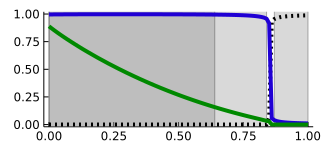

In [48]:
figure_5a = plot_resistance_scan(homing_005, 0.84, 0.87, second_lower_lim = 0.64)

savefig(figure_5a , "home resistance 005.svg")

figure_5a

## Homing resistance in high EJR case (Figure 5b)

In [49]:
return_stats(homing_060, lower_sup = 1e-6, upper_sup = 0.95, max_transgenic = 0.1)

lower bounday: 0.63
upper boundary: 0.67
time to reach 1e-2 within 50 generations is at 0.12


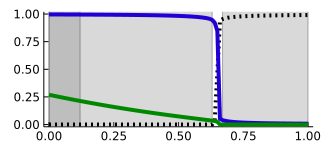

In [50]:
figure_5b = plot_resistance_scan(homing_060, 0.63, 0.67, second_lower_lim = 0.12)

savefig(figure_5b, "home resistance 060.svg")

figure_5b

## Shredding resistance in low EJR case (Figure 5c)

In [51]:
return_stats(shredding_005, lower_sup = 1e-6, upper_sup = 0.95, max_transgenic = 0.1)

lower bounday: 0.49
upper boundary: 0.89
time to reach 1e-2 within 50 generations is at 0.59


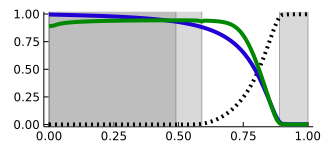

In [52]:
figure_5c = plot_resistance_scan(shredding_005, 0.49, 0.89, second_lower_lim = 0.59)

savefig(figure_5c, "shred resistance 005.svg")

figure_5c

## Shredding resistance in high EJR case (Figure 5d)

In [53]:
return_stats(shredding_060, lower_sup = 1e-6, upper_sup = 0.95, max_transgenic = 0.1)

lower bounday: 0.28
upper boundary: 0.41
time to reach 1e-2 within 50 generations is at 0.07


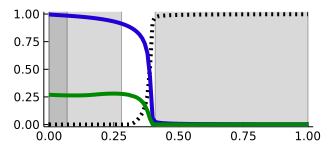

In [54]:
figure_5d = plot_resistance_scan(shredding_060, 0.28, 0.41, second_lower_lim = 0.07)

savefig(figure_5d, "shred resistance 060.svg")

figure_5d

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

# Supplementary figures

# Examples of time courses for populations with pre-existing resistances

## Homing resistance; in low EJR (5%) scenario

In [55]:
apply_parameters_set(Parameters_set_sensitivity2)

Dict{String, Matrix} with 7 entries:
  "selection_matrix"     => BigFloat[1.0; 0.99; … ; 1.0; 1.0;;]
  "homing_matrix"        => Any[1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0…
  "mutation_matrix"      => Any[1.0 0.0 … 0.0 0.0; 0.0 0.999998 … 0.0 0.0; … ; …
  "egg_matrix"           => Any[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0…
  "recombination_matrix" => Any[1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0…
  "sperm_matrix"         => Any[0.5 0.0 … 0.0 0.0; 0.454545 0.454545 … 0.0 0.0;…
  "editing_matrix"       => Any[1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0…

In [56]:
finalplot = []

for i in 0:0.2:1
    population_scan = generate_population(r3 = i);
    population_scan[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.001");
    
    simulation = timecourse(150, population_scan)
    
    plot_result = plot_run_comprehensive(simulation, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, res3_bool = true)
    plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

    savefig(plot_result, string("homing resistance low EJR ", i*100, "% .svg"))
    
    push!(finalplot, plot_result)
end

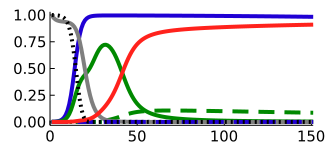

In [57]:
finalplot[1]

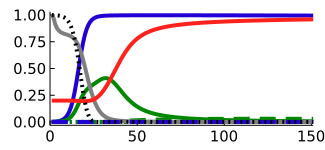

In [58]:
finalplot[2]

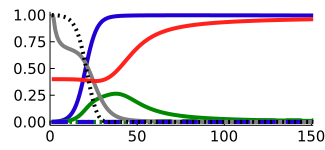

In [59]:
finalplot[3]

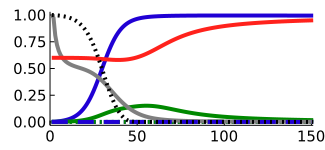

In [60]:
finalplot[4]

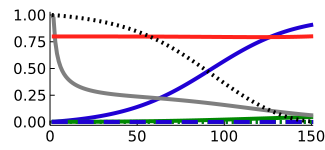

In [61]:
finalplot[5]

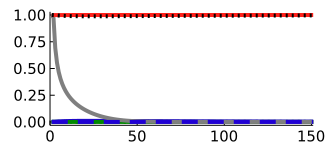

In [62]:
finalplot[6]

## Shredding resistance, in low EJR (5%) scenario

In [63]:
finalplot = []

for i in 0:0.2:1
    population_scan = generate_population(r2 = i);
    population_scan[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.001");
    
    simulation = timecourse(150, population_scan)
    
    plot_result = plot_run_comprehensive(simulation, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, res2_bool = true)
    plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

    savefig(plot_result, string("shredding resistance low EJR ", i*100, "% .svg"))
    
    push!(finalplot, plot_result)
    
end

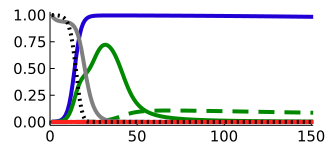

In [64]:
finalplot[1]

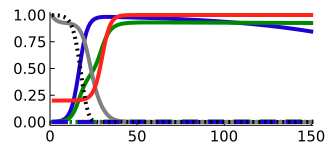

In [65]:
finalplot[2]

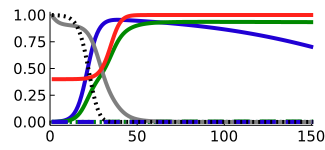

In [66]:
finalplot[3]

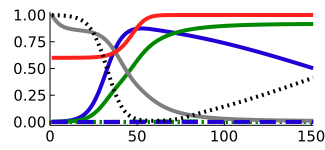

In [67]:
finalplot[4]

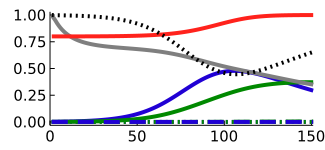

In [68]:
finalplot[5]

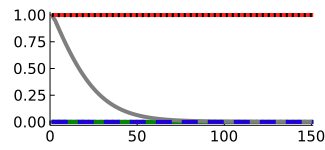

In [69]:
finalplot[6]

In [70]:
apply_parameters_set(Parameters_set_sensitivity3)

Dict{String, Matrix} with 7 entries:
  "selection_matrix"     => BigFloat[1.0; 0.99; … ; 1.0; 1.0;;]
  "homing_matrix"        => Any[1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0…
  "mutation_matrix"      => Any[1.0 0.0 … 0.0 0.0; 0.0 0.999998 … 0.0 0.0; … ; …
  "egg_matrix"           => Any[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0…
  "recombination_matrix" => Any[1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0…
  "sperm_matrix"         => Any[0.5 0.0 … 0.0 0.0; 0.454545 0.454545 … 0.0 0.0;…
  "editing_matrix"       => Any[1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0…

## Homing resistance, in high EJR (60%) scenario

In [71]:
finalplot = []

for i in 0:0.2:1
    population_scan = generate_population(r3 = i);
    population_scan[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.001");
    
    simulation = timecourse(150, population_scan)
    
    plot_result = plot_run_comprehensive(simulation, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, res3_bool = true)
    plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

    savefig(plot_result, string("homing resistance high EJR ", i*100, "% .svg"))
    
    push!(finalplot, plot_result)
    
end

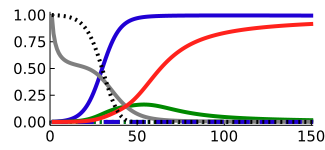

In [72]:
finalplot[1]

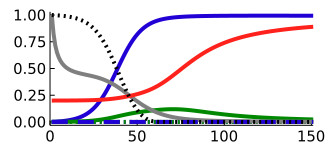

In [73]:
finalplot[2]

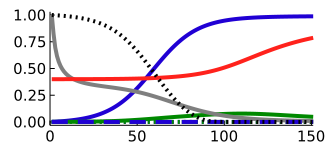

In [74]:
finalplot[3]

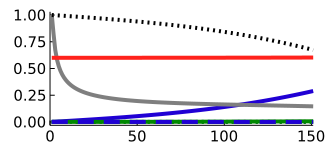

In [75]:
finalplot[4]

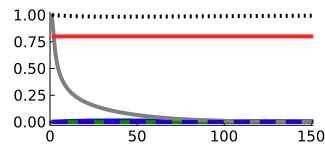

In [76]:
finalplot[5]

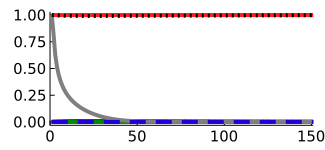

In [77]:
finalplot[6]

## Shredding resistance, in high EJR (60%) scenario

In [78]:
finalplot = []

for i in 0:0.2:1
    population_scan = generate_population(r2 = i);
    population_scan[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.001");
    
    simulation = timecourse(150, population_scan)
    
    plot_result = plot_run_comprehensive(simulation, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, res2_bool = true)
    plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

    savefig(plot_result, string("shredding resistance high EJR ", i*100, "% .svg"))
    
    push!(finalplot, plot_result)
    
end

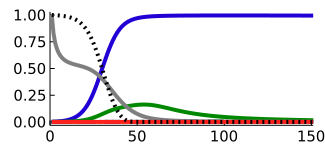

In [79]:
finalplot[1]

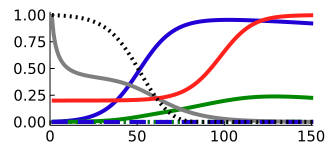

In [80]:
finalplot[2]

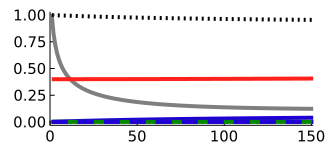

In [81]:
finalplot[3]

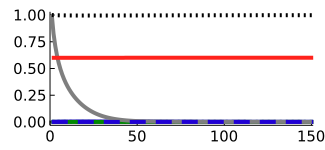

In [82]:
finalplot[4]

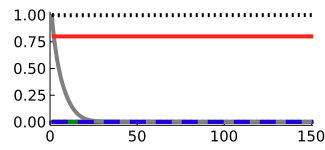

In [83]:
finalplot[5]

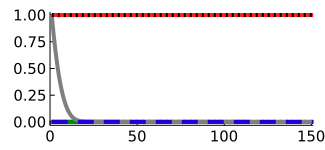

In [84]:
finalplot[6]

In [ ]:
#now we turn mutations on
mutations_parameters_strong = deepcopy(new_baseline_parameters);


#no mutation
mutations_parameters_strong["m_1"] = 1e-3;
mutations_parameters_strong["m_2"] = 1e-3;
mutations_parameters_strong["s_d"] = 0.05;


apply_parameters_set(mutations_parameters_strong);

In [ ]:
mutations_run2 = timecourse(300, genotype_standard);

In [ ]:
SupFig2a = plot_run_comprehensive(mutations_run2,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, log_safe = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10, yaxis=:log, ylims = (1e-8, 1.5))

savefig(SupFig2a, "SupFig2a.svg")

SupFig2a

In [ ]:
mutations_run3 = one_dimensional_population_string(900, 30, 25, generate_population(), generate_population());

In [ ]:
SupFig3a = plot_run_comprehensive(mutations_run3[50],
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, log_safe = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10, yaxis=:log, ylims = (1e-8, 1.5))
plot!(xlims=(300,500))
savefig(SupFig3a, "SupFig3a.svg")

SupFig3a

In [ ]:
SupFig3b = plot_run_comprehensive(mutations_run3[1], Cas9_bool = true, gRNA1_bool = true, shredder_bool = true, gRNA2_bool = true,
            given_dpi = 300, given_size = (325,150), )
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)


savefig(SupFig3b, "SupFig3b.svg")
SupFig3b

In [ ]:
SupFig3c = plot_run_comprehensive(mutations_run3[20], Cas9_bool = true, gRNA1_bool = true, shredder_bool = true, gRNA2_bool = true,
            given_dpi = 300, given_size = (325,150), )
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)


savefig(SupFig3c, "SupFig3c.svg")
SupFig3c

In [ ]:
SupFig3d = plot_run_comprehensive(mutations_run3[50], Cas9_bool = true, gRNA1_bool = true, shredder_bool = true, gRNA2_bool = true,
            given_dpi = 300, given_size = (325,150), )
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig(SupFig3d, "SupFig3d.svg")
SupFig3d

In [ ]:
for i in 1:length(mutations_run3)
    
    fig = plot_run_comprehensive(mutations_run3[i], Cas9_bool = true, gRNA1_bool = true, shredder_bool = true, gRNA2_bool = true,
            given_dpi = 300, given_size = (325,150), )
    plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)
    
    savefig(fig, string("SupFig3e_", i,".svg"))

end

In [ ]:
geo_frequency = return_geographical_spread2(mutations_run3)
writedlm("geo_frequency",  geo_frequency, ',')

In [ ]:
#geo_frequency = readdlm("geo_frequency", ',')

SupFig3F = plot(geo_frequency[2:end, 1], geo_frequency[2:end,5], dpi = 300, size = (325,150), lw = 4, legend=false, ytickfontsize = 10, 
    xtickfontsize = 10, label = "Cas9")
plot!(geo_frequency[2:end,1], geo_frequency[2:end,6], dpi = 300, size = (325,150), lw =4, legend=false, ytickfontsize = 10, 
    xtickfontsize = 10, label = "gRNA1")
plot!(geo_frequency[2:end,1], geo_frequency[2:end,7], dpi = 300, size = (325,150), lw = 4, legend=false, ytickfontsize = 10, 
    xtickfontsize = 10, label = "Shredder")
plot!(geo_frequency[2:end,1], geo_frequency[2:end,8], dpi = 300, size = (325,150), lw = 4, legend=false, ytickfontsize = 10, 
    xtickfontsize = 10, label = "gRNA2")

savefig(SupFig3F, "SupFig3F.svg")

SupFig3F

In [ ]:
mutations_parameters_intermediate = deepcopy(mutations_parameters_strong)
mutations_parameters_intermediate["m_2"] = 1e-4;
mutations_parameters_intermediate["s_d"] = 0.01;

apply_parameters_set(mutations_parameters_intermediate);

In [ ]:
mutations_run4 = one_dimensional_population_string(900, 30, 25, generate_population(), generate_population());

In [ ]:
geo_frequency4 = return_geographical_spread2(mutations_run4)
writedlm("geo_frequency4",  geo_frequency4, ',');

In [ ]:
#geo_frequency4 = readdlm("geo_frequency4", ',')

SupFig3G = plot(geo_frequency4[2:end, 1], geo_frequency4[2:end,5], dpi = 300, size = (325,150), lw = 4, legend=false, ytickfontsize = 10, 
    xtickfontsize = 10, label = "Cas9")
plot!(geo_frequency4[2:end,1], geo_frequency4[2:end,6], dpi = 300, size = (325,150), lw =4, legend=false, ytickfontsize = 10, 
    xtickfontsize = 10, label = "gRNA1")
plot!(geo_frequency4[2:end,1], geo_frequency4[2:end,7], dpi = 300, size = (325,150), lw = 4, legend=false, ytickfontsize = 10, 
    xtickfontsize = 10, label = "Shredder")
plot!(geo_frequency4[2:end,1], geo_frequency4[2:end,8], dpi = 300, size = (325,150), lw = 4, legend=false, ytickfontsize = 10, 
    xtickfontsize = 10, label = "gRNA2")
plot!(ylims = (0,1))
savefig(SupFig3G, "SupFig3G.svg")

SupFig3G

In [ ]:
for i in 1:length(mutations_run4)
    
    fig = plot_run_comprehensive(mutations_run4[i], Cas9_bool = true, gRNA1_bool = true, shredder_bool = true, gRNA2_bool = true,
            given_dpi = 300, given_size = (325,150), )
    plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)
    
    savefig(fig, string("SupFig3h_", i,".svg"))

end

# High er3 values to prove that X-Shredder does not need to reach high frequencies

In [ ]:
er3_0 = deepcopy(Parameters_set_sensitivity1)
er3_0["er_3"] = BigFloat("0")

er3_005 = deepcopy(Parameters_set_sensitivity1)
er3_005["er_3"] = BigFloat("0.05")

er3_01 = deepcopy(Parameters_set_sensitivity1)
er3_01["er_3"] = BigFloat("0.1")

er3_02 = deepcopy(Parameters_set_sensitivity1)
er3_02["er_3"] = BigFloat("0.2")

er3_04 = deepcopy(Parameters_set_sensitivity1)
er3_04["er_3"] = BigFloat("0.4")

er3_05 = deepcopy(Parameters_set_sensitivity1)
er3_05["er_3"] = BigFloat("0.5")

er3_06 = deepcopy(Parameters_set_sensitivity1)
er3_06["er_3"] = BigFloat("0.6")

er3_07 = deepcopy(Parameters_set_sensitivity1)
er3_07["er_3"] = BigFloat("0.7")

er3_075 = deepcopy(Parameters_set_sensitivity1)
er3_075["er_3"] = BigFloat("0.75")

er3_08 = deepcopy(Parameters_set_sensitivity1)
er3_08["er_3"] = BigFloat("0.8")

er3_09 = deepcopy(Parameters_set_sensitivity1)
er3_09["er_3"] = BigFloat("0.9");

In [ ]:
apply_parameters_set(er3_0);

run_er3_0_together = timecourse(100, genotype_standard)
run_er3_0_separate = timecourse(100, separate_release)

apply_parameters_set(er3_005);

run_er3_005_together = timecourse(100, genotype_standard)
run_er3_005_separate = timecourse(100, separate_release)

apply_parameters_set(er3_01);

run_er3_01_together = timecourse(100, genotype_standard)
run_er3_01_separate = timecourse(100, separate_release)

apply_parameters_set(er3_02);

run_er3_02_together = timecourse(100, genotype_standard)
run_er3_02_separate = timecourse(100, separate_release)

apply_parameters_set(er3_04);

run_er3_04_together = timecourse(100, genotype_standard)
run_er3_04_separate = timecourse(100, separate_release)

apply_parameters_set(er3_05);

run_er3_05_together = timecourse(100, genotype_standard)
run_er3_05_separate = timecourse(100, separate_release)

apply_parameters_set(er3_07);

run_er3_07_together = timecourse(100, genotype_standard)
run_er3_07_separate = timecourse(100, separate_release)

In [ ]:
apply_parameters_set(er3_075);

run_er3_075_together = timecourse(500, genotype_standard)
run_er3_075_separate = timecourse(500, separate_release)

apply_parameters_set(er3_08);

run_er3_08_together = timecourse(500, genotype_standard)
run_er3_08_separate = timecourse(500, separate_release)

apply_parameters_set(er3_09);

run_er3_09_together = timecourse(500, genotype_standard)
run_er3_09_separate = timecourse(500, separate_release);

In [ ]:
tog_0 = plot_run_comprehensive(run_er3_0_together, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("tog_0.svg")

tog_0

In [ ]:
tog_005 = plot_run_comprehensive(run_er3_005_together, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("tog_005.svg")

tog_005

In [ ]:
tog_01 = plot_run_comprehensive(run_er3_01_together, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("tog_01.svg")

tog_01

In [ ]:
tog_02 = plot_run_comprehensive(run_er3_02_together, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("tog_02.svg")

tog_02

In [ ]:
tog_04 = plot_run_comprehensive(run_er3_04_together, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("tog_04.svg")

tog_04

In [ ]:
tog_05 = plot_run_comprehensive(run_er3_05_together, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("tog_05.svg")

tog_05

In [ ]:
tog_07 = plot_run_comprehensive(run_er3_07_together, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("tog_07.svg")

tog_07

In [ ]:
tog_075 = plot_run_comprehensive(run_er3_075_together, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("tog_075.svg")

tog_075

In [ ]:
tog_08 = plot_run_comprehensive(run_er3_08_together, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("tog_08.svg")

tog_08

In [ ]:
tog_09 = plot_run_comprehensive(run_er3_09_together, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("tog_09.svg")

tog_09

In [ ]:
sep_0 = plot_run_comprehensive(run_er3_0_separate, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("sep_0.svg")

sep_0

In [ ]:
sep_005  = plot_run_comprehensive(run_er3_005_separate, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("sep_005.svg")

sep_005

In [ ]:
sep_01 = plot_run_comprehensive(run_er3_01_separate, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("sep_01.svg")

sep_01

In [ ]:
sep_02 = plot_run_comprehensive(run_er3_02_separate, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("sep_02.svg")

sep_02

In [ ]:
sep_04 = plot_run_comprehensive(run_er3_04_separate, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("sep_04.svg")

sep_04

In [ ]:
sep_05 = plot_run_comprehensive(run_er3_05_separate, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("sep_05.svg")

sep_05

In [ ]:
sep_07 = plot_run_comprehensive(run_er3_07_separate, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("sep_07.svg")

sep_07

In [ ]:
sep_075 = plot_run_comprehensive(run_er3_075_separate, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("sep_075.svg")

sep_075

In [ ]:
sep_08 = plot_run_comprehensive(run_er3_08_separate, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("sep_08.svg")

sep_08

In [ ]:
sep_09 = plot_run_comprehensive(run_er3_09_separate, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("sep_09.svg")

sep_09

# Theta does not affect dynamics

In [ ]:
Parameters_set_lots_going_on1 = Dict(

    #conditionality factor, describing whether X-shredding only happens in presence
    #of YLE (=0) or in presence of all Y chromosomes (=1)
    "c" => BigFloat("1"),

    # selection against carrying edited X gene (homozygous, females)
    "s_f" => BigFloat("0.99"),

    # dominance coefficient for carrying edited X gene (heterozygous, females)
    "h_f" => BigFloat("0.99"),

    # selection against carrying edited X gene (males)
    "s_m" => BigFloat("0.01"),

    "s_a" => BigFloat("0.01"),
    "s_b" => BigFloat("0.01"),
    "s_c" => BigFloat("0.01"),
    "s_d" => BigFloat("0.01"),
    "s_e" => BigFloat("0.01"),
    "h_e" => BigFloat("1"),

    #efficiency of editing (e_e)
    "e_e" => BigFloat("0.95"),

    #efficiency of homing (e_c)
    "e_h" => BigFloat("0.95"),

    #mutation rate during homing (m)
    "m_1" => BigFloat("1e-3"),

    #background mutation rate of all components
    "m_2" => BigFloat("1e-6"),

    #efficiency of X-shredding
    "e_s" => BigFloat("0.90"),

    #dominance coefficient of X-shredding activity
    "h_e2" => BigFloat("0.99"),

    #intrinsic rate of population increase
    "Rm" => BigFloat("6"),

    #density independent survival rate
    "theta" => BigFloat("0.1"),

    #rate with which editing resistance occurs during editing process
    "er_1" => BigFloat("1e-9"),

    #rate with which shredding resistance occurs during shredding process
    "er_2" => BigFloat("1e-6"),

    #rate with which homing resistance occurs during the homing process
    "er_3" => BigFloat("1e-6"),

    #recombination rate (X-linked loci;Editing gene and shredding target site)
    "r" => BigFloat("0.5"),
)

Parameters_set_lots_going_on2 = deepcopy(Parameters_set_lots_going_on1)
Parameters_set_lots_going_on2["theta"] = BigFloat("0.3")

Parameters_set_lots_going_on3 = deepcopy(Parameters_set_lots_going_on1)
Parameters_set_lots_going_on3["theta"] = BigFloat("0.5")

Parameters_set_lots_going_on4 = deepcopy(Parameters_set_lots_going_on1)
Parameters_set_lots_going_on4["theta"] = BigFloat("0.7")

Parameters_set_lots_going_on5 = deepcopy(Parameters_set_lots_going_on1)
Parameters_set_lots_going_on5["theta"] = BigFloat("0.9")

Parameters_set_lots_going_on6 = deepcopy(Parameters_set_lots_going_on1)
Parameters_set_lots_going_on6["theta"] = BigFloat("0.01");

In [ ]:
apply_parameters_set(Parameters_set_lots_going_on1)
theta1 = timecourse(100, genotype_standard)

apply_parameters_set(Parameters_set_lots_going_on2)
theta2 = timecourse(100, genotype_standard)

apply_parameters_set(Parameters_set_lots_going_on3)
theta3 = timecourse(100, genotype_standard)

apply_parameters_set(Parameters_set_lots_going_on4)
theta4 = timecourse(100, genotype_standard)

apply_parameters_set(Parameters_set_lots_going_on5)
theta5 = timecourse(100, genotype_standard)

apply_parameters_set(Parameters_set_lots_going_on6)
theta6 = timecourse(100, genotype_standard);

In [ ]:
thet_1 = plot_run_comprehensive(theta1, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("thet_1.svg")

thet_1

In [ ]:
thet_2 = plot_run_comprehensive(theta2, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("thet_2.svg")

thet_2

In [ ]:
thet_3 = plot_run_comprehensive(theta3, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("thet_3.svg")

thet_3

In [ ]:
thet_4 = plot_run_comprehensive(theta4, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("thet_4.svg")

thet_4

In [ ]:
thet_5 = plot_run_comprehensive(theta5, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("thet_5.svg")

thet_5

In [ ]:
thet_6 = plot_run_comprehensive(theta6, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("thet_6.svg")

thet_6

In [ ]:
higher_RM_parameters = deepcopy(new_baseline_parameters)
higher_RM_parameters["Rm"] = 15

apply_parameters_set(higher_RM_parameters);

In [ ]:
higher_RM_run = timecourse(150, genotype_standard);

In [ ]:
higher_RM_plot = plot_run_comprehensive(higher_RM_run, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig("higher_RM_plot.svg")

higher_RM_plot

In [ ]:
plot_run_comprehensive(higher_RM_run, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10, yaxis=:log, log_safe = true, ylims = (1e-100,1))

In [ ]:
higher_RM_parameters2 = deepcopy(Parameters_set_sensitivity2)
higher_RM_parameters2["Rm"] = 15

apply_parameters_set(higher_RM_parameters2);

In [ ]:
higher_RM_run2 = timecourse(300, genotype_standard);

In [ ]:
plot_run_comprehensive(higher_RM_run2, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)#, yaxis=:log, log_safe = true, ylims = (1e-30,1))

In [ ]:
apply_parameters_set(Parameters_set_sensitivity2);

In [ ]:
sensitivity2_run = timecourse(300, genotype_standard);

In [ ]:
plot_run_comprehensive(sensitivity2_run, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10, yaxis=:log, log_safe = true, ylims = (1e-30,1))

In [23]:
Burt_Deredec_2018_parameters = deepcopy(Parameters_set_standard);


#editing efficiency
Burt_Deredec_2018_parameters["e_e"] = 1.0;

#shredding efficiency
Burt_Deredec_2018_parameters["e_s"] = 1.0;

#shredding activity is perfectly dominant
Burt_Deredec_2018_parameters["h_e2"] = 1.0;

#homing efficiency
Burt_Deredec_2018_parameters["e_h"] = 0.0;



#no resistance occuring at target sites
Burt_Deredec_2018_parameters["er_1"] = 0.0;
Burt_Deredec_2018_parameters["er_2"] = 0.0;
Burt_Deredec_2018_parameters["er_3"] = 0.0;


#no loss of function mutations
Burt_Deredec_2018_parameters["m_1"] = 0.0;
Burt_Deredec_2018_parameters["m_2"] = 0.0;


#ideal intended fitness costs are perfect
Burt_Deredec_2018_parameters["s_f"] = 1.0;
Burt_Deredec_2018_parameters["h_f"] = 1.0;


#no unintended fitness costs
Burt_Deredec_2018_parameters["s_a"] = 0.0;
Burt_Deredec_2018_parameters["s_b"] = 0.0;
Burt_Deredec_2018_parameters["s_c"] = 0.0;
Burt_Deredec_2018_parameters["s_d"] = 0.0;
Burt_Deredec_2018_parameters["s_e"] = 0.0;
Burt_Deredec_2018_parameters["h_e"] = 0.0;
Burt_Deredec_2018_parameters["s_m"] = 0.0;

#intrinsic rate of population increase of 6
Burt_Deredec_2018_parameters["Rm"] = 6

apply_parameters_set(Burt_Deredec_2018_parameters);

In [24]:
YLE_alone_recurrent_10_percent = timecourse(30, generate_population(), number_of_releases = 30, release_genotype = ["AB" "ef" "cd" "cd"], release_size = BigFloat("0.1"))


Dict{String,Array{BigFloat,2}} with 5 entries:
  "genotypes" => BigFloat[1.0 0.909091 … 8.82549e-1275 1.43864e-2109; 0.0 0.0 ……
  "wildtype"  => BigFloat[1.0 1.0 … 7.47545e-933 2.84004e-1521; 0.0 0.0 … 0.0 0…
  "eggs"      => BigFloat[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0…
  "zygotes"   => BigFloat[0.0 54.5455 … 8.82549e-1274 1.43864e-2108; 0.0 0.0 … …
  "sperm"     => BigFloat[0.0 0.454545 … 1.16151e-685 5.88366e-1274; 0.0 0.0 … …

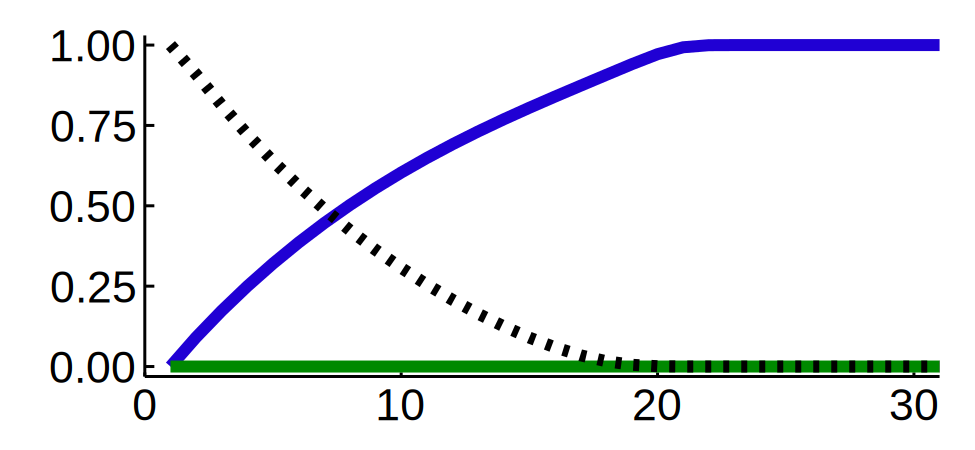

In [35]:
SI_figure_YLE_alone_recurrent_10_percent = plot_run_comprehensive(YLE_alone_recurrent_10_percent, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150))
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig(SI_figure_YLE_alone_recurrent_10_percent, "SI_figure_YLE_alone_recurrent_10_percent.svg")

SI_figure_YLE_alone_recurrent_10_percent

In [33]:
YLE_alone_single_10_percent_population = generate_population();
YLE_alone_single_10_percent_population[return_i(["AB" "ef" "cd" "cd"], genotypes_detailed)] = BigFloat("0.1");


YLE_alone_single_10_percent = timecourse(30, YLE_alone_single_10_percent_population)


Dict{String,Array{BigFloat,2}} with 5 entries:
  "genotypes" => BigFloat[1.0 0.909091 … 0.890909 0.890909; 0.0 0.0 … 0.0 0.0; …
  "wildtype"  => BigFloat[1.0 0.909091 … 0.890909 0.890909; 0.0 0.0 … 0.0 0.0; …
  "eggs"      => BigFloat[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0…
  "zygotes"   => BigFloat[0.0 54.5455 … 48.595 48.595; 0.0 0.0 … 0.0 0.0; … ; 0…
  "sperm"     => BigFloat[0.0 0.454545 … 0.454545 0.454545; 0.0 0.0 … 0.0 0.0; …

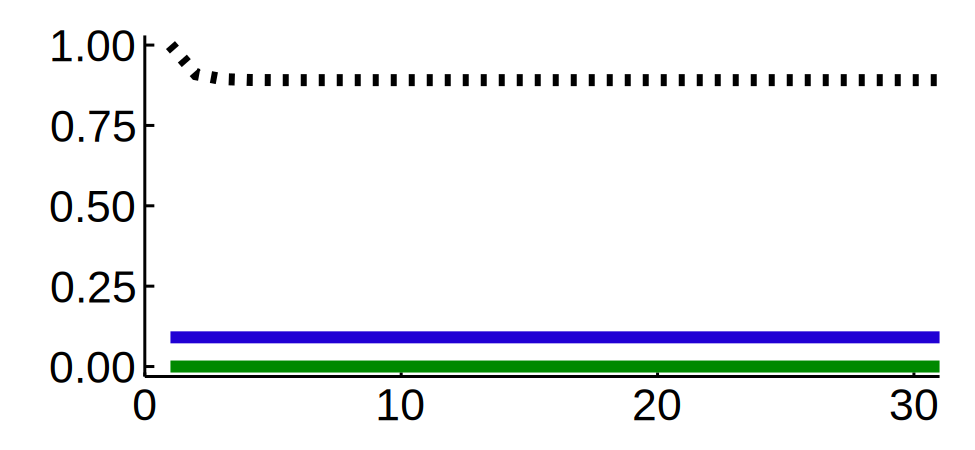

In [36]:
SI_figure_YLE_alone_single_10_percent = plot_run_comprehensive(YLE_alone_single_10_percent, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150))
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)


savefig(SI_figure_YLE_alone_single_10_percent, "SI_figure_YLE_alone_single_10_percent.svg")

SI_figure_YLE_alone_single_10_percent

In [40]:
genotype_YLE_ASD_10_percent = generate_population();
genotype_YLE_ASD_10_percent[return_i(["AB" "ef" "CD" "CD"], genotypes_detailed)] = BigFloat("0.1");


YLE_ASD_single_10_percent_Burt_Deredec_Params = timecourse(50, genotype_YLE_ASD_10_percent)

Dict{String,Array{BigFloat,2}} with 5 entries:
  "genotypes" => BigFloat[1.0 0.909091 … 0.256383 0.256208; 0.0 0.0 … 0.0017447…
  "wildtype"  => BigFloat[1.0 0.909091 … 0.255671 0.255499; 0.0 0.0 … 0.0010320…
  "eggs"      => BigFloat[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0…
  "zygotes"   => BigFloat[0.0 54.5455 … 6.11936 6.11272; 0.0 0.0 … 0.0416444 0.…
  "sperm"     => BigFloat[0.0 0.454545 … 0.183973 0.1839; 0.0 0.0 … 0.00113584 …

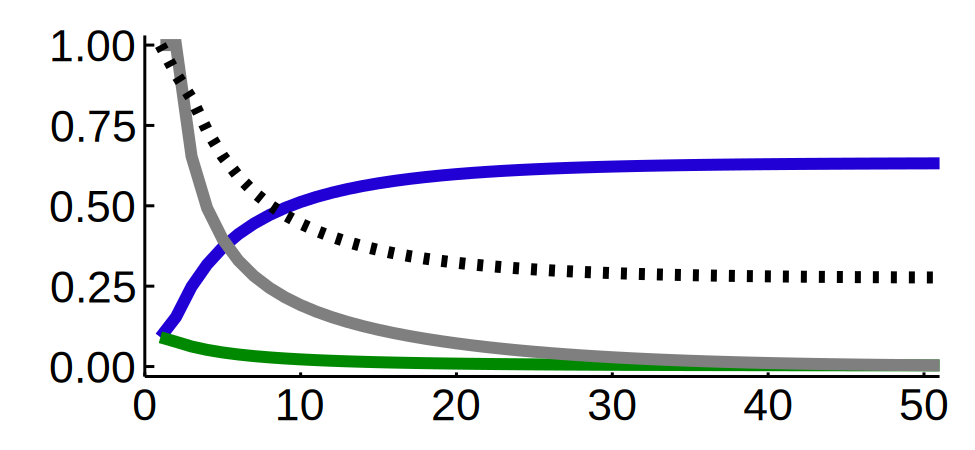

In [41]:
SI_figure_YLE_ASD_single_10_percent_Burt_Deredec_Params = plot_run_comprehensive(YLE_ASD_single_10_percent_Burt_Deredec_Params, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150))
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)


savefig(SI_figure_YLE_ASD_single_10_percent_Burt_Deredec_Params, "SI_figure_YLE_ASD_single_10_percent_Burt_Deredec_Params.svg")

SI_figure_YLE_ASD_single_10_percent_Burt_Deredec_Params

In [46]:
new_baseline_parameters_NO_HOMING = deepcopy(new_baseline_parameters)
new_baseline_parameters_NO_HOMING["e_h"] = 0.0;
apply_parameters_set(new_baseline_parameters_NO_HOMING);

genotype_YLE_ASD_10_percent_heterozygous = generate_population();
genotype_YLE_ASD_10_percent_heterozygous[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.1");


YLE_ASD_single_10_percent_Geci_Params = timecourse(50, genotype_YLE_ASD_10_percent_heterozygous)

Dict{String,Array{BigFloat,2}} with 5 entries:
  "genotypes" => BigFloat[1.0 0.909091 … 0.418056 0.417848; 0.0 0.0 … 0.0015626…
  "wildtype"  => BigFloat[1.0 0.909091 … 0.417419 0.417211; 0.0 0.0 … 0.0009241…
  "eggs"      => BigFloat[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0…
  "zygotes"   => BigFloat[0.0 54.5455 … 13.325 13.3137; 0.0 0.0 … 0.0498058 0.0…
  "sperm"     => BigFloat[0.0 0.454545 … 0.253913 0.253826; 0.0 0.0 … 0.0008613…

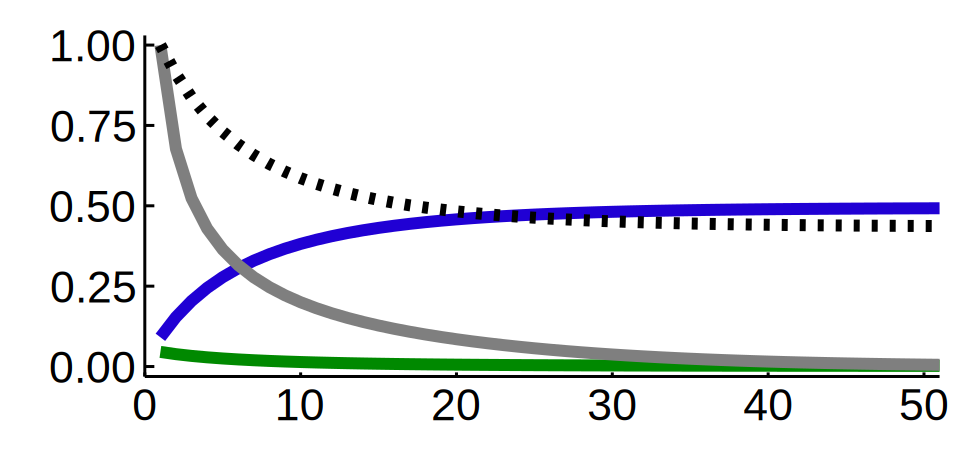

In [47]:
SI_figure_YLE_ASD_single_10_percent_Geci_Params = plot_run_comprehensive(YLE_ASD_single_10_percent_Geci_Params, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150))
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)


savefig(SI_figure_YLE_ASD_single_10_percent_Geci_Params, "SI_figure_YLE_ASD_single_10_percent_Geci_Params.svg")

SI_figure_YLE_ASD_single_10_percent_Geci_Params

In [48]:

genotype_YLE_ASD_0_1_percent_heterozygous = generate_population();
genotype_YLE_ASD_0_1_percent_heterozygous[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.001");


YLE_ASD_single_0_1_percent_Geci_Params = timecourse(50, genotype_YLE_ASD_0_1_percent_heterozygous)

Dict{String,Array{BigFloat,2}} with 5 entries:
  "genotypes" => BigFloat[1.0 0.999001 … 0.988317 0.988307; 0.0 0.0 … 4.13009e-…
  "wildtype"  => BigFloat[1.0 0.999001 … 0.988301 0.988291; 0.0 0.0 … 2.4424e-0…
  "eggs"      => BigFloat[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0…
  "zygotes"   => BigFloat[0.0 59.9401 … 58.7451 58.744; 0.0 0.0 … 0.00245491 0.…
  "sperm"     => BigFloat[0.0 0.4995 … 0.495094 0.49509; 0.0 0.0 … 1.87875e-05 …

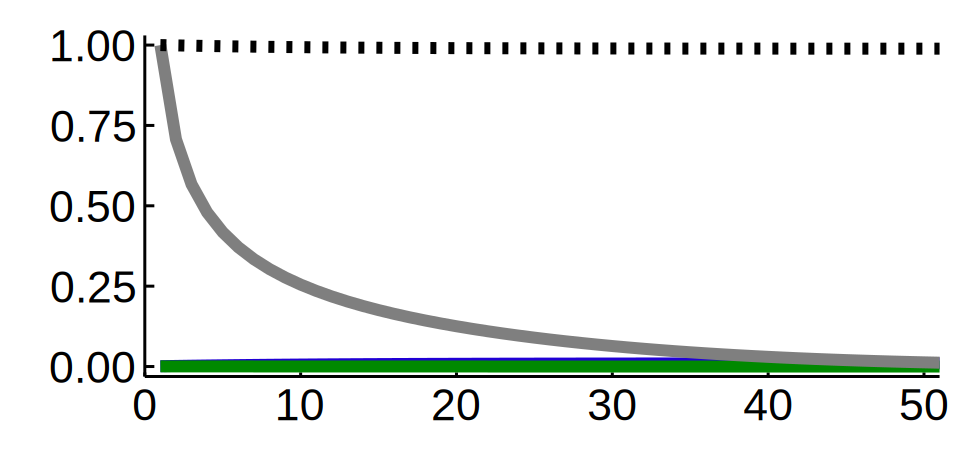

In [49]:
SI_figure_YLE_ASD_single_0_1_percent_Geci_Params = plot_run_comprehensive(YLE_ASD_single_0_1_percent_Geci_Params, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150))
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)


savefig(SI_figure_YLE_ASD_single_0_1_percent_Geci_Params, "SI_figure_YLE_ASD_single_0_1_percent_Geci_Params.svg")

SI_figure_YLE_ASD_single_0_1_percent_Geci_Params

In [51]:
apply_parameters_set(new_baseline_parameters);

run_baseline_scenario = timecourse(50, genotype_standard);

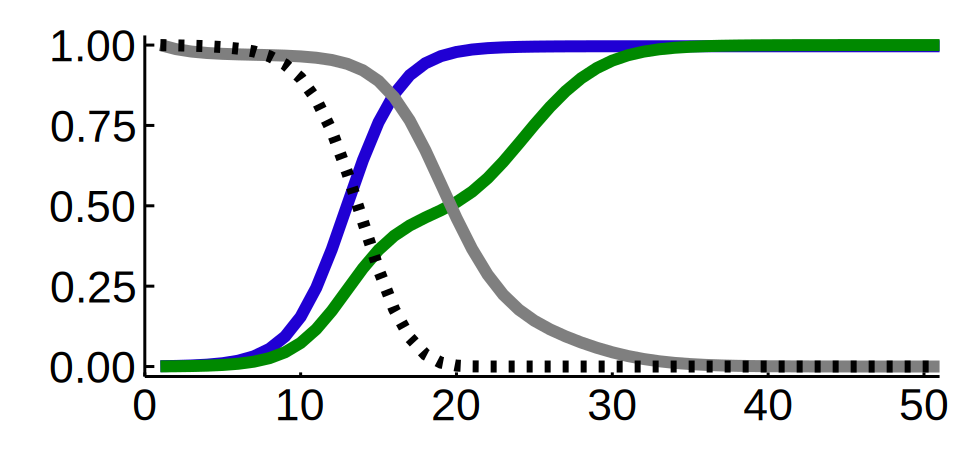

In [53]:
SI_figure_fig2a = plot_run_comprehensive(run_baseline_scenario, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150))
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)


savefig(SI_figure_fig2a, "SI_figure_fig2a.svg")

SI_figure_fig2a

In [8]:
baseline_parameters_but_no_homing = deepcopy(new_baseline_parameters);

baseline_parameters_but_no_homing["e_h"] = 0.0;

apply_parameters_set(baseline_parameters_but_no_homing);

In [9]:
genotype_standard_10_percent = generate_population();
genotype_standard_10_percent[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.1");


genotype_standard = generate_population();
genotype_standard[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.001");

In [10]:
no_homing_10_percent_release = timecourse(100, genotype_standard_10_percent)

no_homing_0_1_percent_release = timecourse(100, genotype_standard)

Dict{String,Array{BigFloat,2}} with 5 entries:
  "genotypes" => BigFloat[1.0 0.999001 … 0.988208 0.988208; 0.0 0.0 … 4.17042e-…
  "wildtype"  => BigFloat[1.0 0.999001 … 0.988191 0.988191; 0.0 0.0 … 2.46436e-…
  "eggs"      => BigFloat[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0…
  "zygotes"   => BigFloat[0.0 59.9401 … 58.733 58.733; 0.0 0.0 … 0.00247864 0.0…
  "sperm"     => BigFloat[0.0 0.4995 … 0.495049 0.495049; 0.0 0.0 … 1.89924e-05…

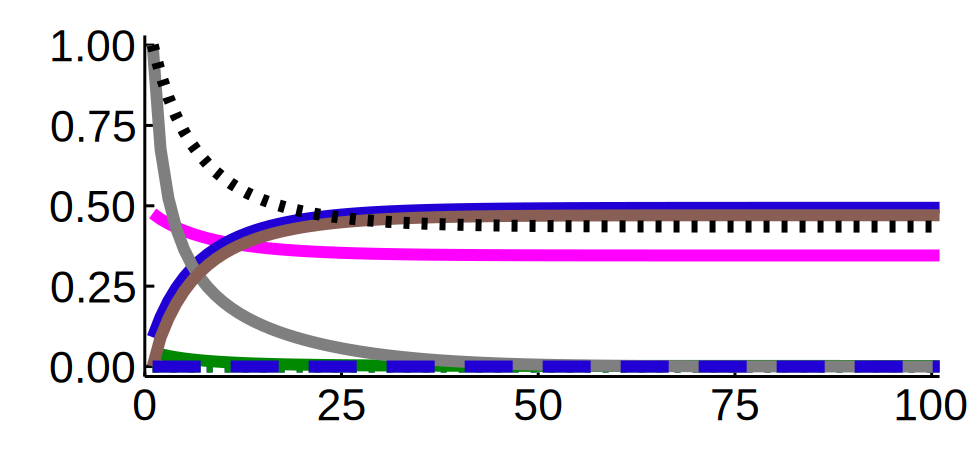

In [14]:
SI_10_percent_no_homing = plot_run_comprehensive(no_homing_10_percent_release, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, load_easy_bool = false, load_demanding_bool = false, print_load = false, sexratio_bool = true,
            inverse_load_bool = true, compare_load_calcuations = false)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig(SI_10_percent_no_homing, "SI_10_percent_no_homing.svg")

SI_10_percent_no_homing

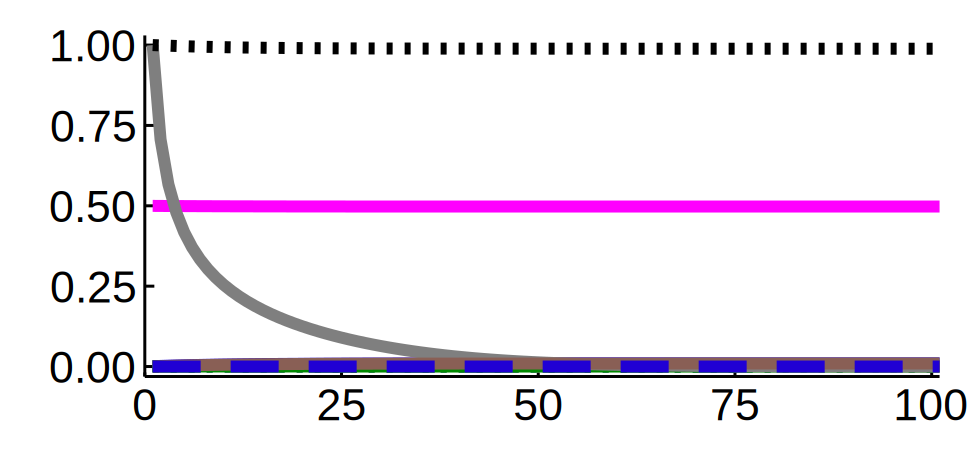

In [17]:
SI_figure_no_homing_0_1_percent_release = plot_run_comprehensive(no_homing_0_1_percent_release, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, load_easy_bool = false, load_demanding_bool = false, print_load = false, sexratio_bool = true,
            inverse_load_bool = true, compare_load_calcuations = false)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

savefig(SI_figure_no_homing_0_1_percent_release, "SI_figure_no_homing_0_1_percent_release.svg")

SI_figure_no_homing_0_1_percent_release

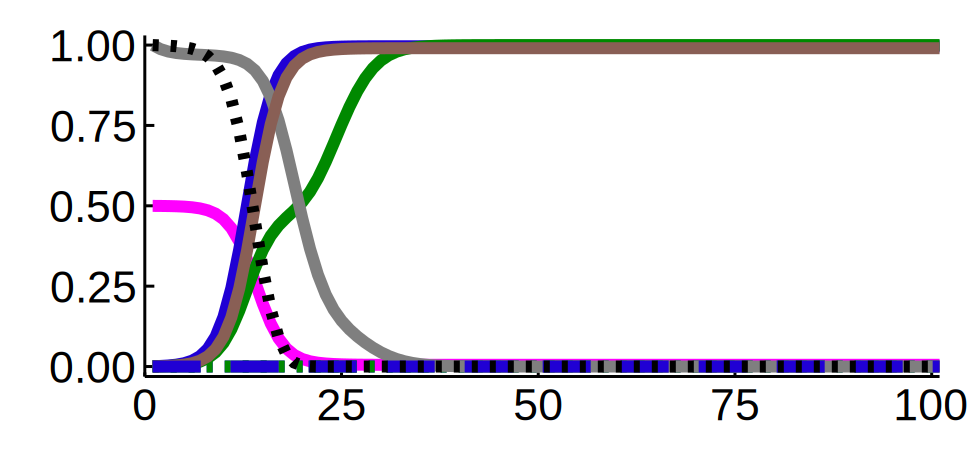

In [13]:
newfig1a